In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    { "figure.figsize": (6, 4) },
    style='ticks',
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_formats = set(('retina', 'svg'))

In [ ]:
pl = pd.read_csv('/content/drive/MyDrive/MSc Project - Football Prediction/pl.csv')


In [ ]:
pl.columns

Index(['FTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY',
       'HR', 'AR', 'AvgH', 'AvgD', 'AvgA', 'MaxH', 'MaxD', 'MaxA', 'MW',
       'Year', 'Max>2.5', 'Max<2.5', 'Avg>2.5', 'Avg<2.5', 'TGD', 'Prob_D',
       'Elo_Before_Home', 'Elo_Before_Away', 'Days_D', 'form_diff', 'SP_diff',
       'Overall_diff', 'Attack_diff', 'Midfield_diff', 'Defence_diff'],
      dtype='object')

In [ ]:
len(pl.columns)

36

# **Sorting out as Away and not away**

In [ ]:
# Define a custom function to apply the transformation
def create_ana(row):
    if row['FTR'] == 'A':
        return 'A'
    elif row['FTR'] in ['H', 'D']:
        return 'NA'
    else:
        return None

In [ ]:
pl['ANA'] = pl.apply(create_ana, axis=1)

In [ ]:
pl['ANA'].value_counts()

NA    2868
A     1312
Name: ANA, dtype: int64

In [ ]:
pl = pl.drop(columns=['FTR'])

# **Train-test-validation split of the dataset**

In [ ]:
!pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
  Created wheel for sklearn: filename=sklearn-0.0.post7-py3-none-any.whl size=2361 sha256=e5826438824f9a1a702fe06ff41804d6906c0ffc4fadc674adef7cf43ecdbd51
  Stored in directory: c:\users\22547960\appdata\local\pip\cache\wheels\ae\cd\c1\7044aa9eba19c0e761bd045ad4d91b9939538ed908b4d5d789
Successfully built sklearn


In [ ]:
!pip install mlxtend

     ---------------------------------------- 1.4/1.4 MB 14.3 MB/s eta 0:00:00


In [ ]:
!pip install imblearn

In [ ]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
from sklearn.model_selection import train_test_split


X = pl.drop(columns=['ANA'])
y = pl['ANA']

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=42)

# **Hyperparmeter tuning individual models**

## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(multi_class='ovr', solver='liblinear')

### **scaling the data**

In [ ]:
norm_cols=['MW', 'Year','Overall_diff', 'Attack_diff',\
       'Midfield_diff', 'Defence_diff']

In [ ]:
std_cols = [col for col in X_train.columns if col not in norm_cols]

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,Normalizer

In [ ]:
# Create transformers
stdscaling_transformer = StandardScaler()
normscaling_transformer = Normalizer()

# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("std", stdscaling_transformer, std_cols),
        ("norm", normscaling_transformer, norm_cols)
    ],
    remainder='passthrough'
)

# Apply the transformations and convert back to a pandas DataFrame
X_train_scale = preprocessor.fit_transform(X_train)
X_train_scale = pd.DataFrame(X_train_scale, columns=std_cols + norm_cols)

In [ ]:
X_train_scale.head(5)

,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,...,Elo_Before_Away,Days_D,form_diff,SP_diff,MW,Year,Overall_diff,Attack_diff,Midfield_diff,Defence_diff
0,0.719291,-0.068497,-0.344458,-0.846806,-0.749180,0.007827,0.387640,-0.638109,-1.254484,0.183019,...,-0.807417,-0.004156,1.000239,0.424784,0.013887,0.999891,0.002480,0.002976,0.002480,0.001984
1,1.778528,-0.477947,0.353327,0.371920,-1.338002,0.290761,-0.583881,-0.267115,-0.441167,0.960121,...,-0.979516,-0.004156,0.247957,1.418284,0.006429,0.999972,0.001484,0.001978,0.002473,0.001484
2,0.719291,-1.501574,-0.693351,-1.659291,-0.454769,-0.275107,-0.907721,-0.638109,-0.441167,1.737224,...,-1.451476,2.237324,-0.286267,0.027385,0.015855,0.999872,0.000991,0.000495,0.000991,0.001486
3,-0.869564,1.978756,0.353327,1.184405,-0.454769,-1.406842,-0.260041,2.700834,-1.254484,-1.371187,...,-0.626763,-0.004156,2.359889,1.219584,0.015390,0.999880,0.000496,-0.000496,0.000993,0.000993
4,1.072370,-0.887398,1.051113,-0.440564,-1.043591,0.573695,-0.907721,-1.380096,-1.254484,-0.594084,...,1.793697,-0.004156,-0.195649,-0.370015,0.009405,0.999928,-0.003960,-0.004455,-0.003465,-0.002970


In [ ]:
X_val_scale = preprocessor.fit_transform(X_val)
X_val_scale = pd.DataFrame(X_val_scale, columns=std_cols + norm_cols)

X_val_scale.head(5)

,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,...,Elo_Before_Away,Days_D,form_diff,SP_diff,MW,Year,Overall_diff,Attack_diff,Midfield_diff,Defence_diff
0,-1.958078,0.522275,-1.079245,1.107549,-0.454942,0.063528,-1.612581,-0.989545,-0.418118,0.238479,...,1.069591,0.054890,0.365082,1.684272,0.009896,0.999946,-0.001484,-0.000495,-0.000990,-0.002474
1,0.536394,-0.697988,1.005495,-0.468941,0.783536,-1.843519,0.946889,1.542716,1.303241,-0.543591,...,-1.251670,-0.044089,0.518769,0.467869,0.008403,0.999947,0.002471,0.002966,0.003954,0.001977
2,1.249100,-1.104742,1.352952,-0.074818,-1.693419,-0.208908,3.826293,-1.713048,-1.278797,-0.543591,...,-0.840097,-0.044089,0.994748,0.467869,0.011892,0.999892,0.003964,0.004955,0.004955,0.002973
3,0.892747,0.522275,1.352952,0.713426,-0.764561,0.335963,0.626955,1.180965,0.442562,1.020548,...,-1.771235,0.054890,0.917668,0.467869,0.016888,0.999854,0.000993,0.000000,0.001987,0.000993
4,-0.889019,-1.104742,-0.036875,-0.468941,1.402775,1.153269,-0.332846,0.095710,-0.418118,3.366757,...,0.523247,0.054890,0.258993,0.670603,0.005451,0.999983,0.000000,-0.000991,0.001487,0.000496


### **Fitting a simple model**

In [ ]:
lgc = LogisticRegression(multi_class='ovr', solver='liblinear')

In [ ]:
lgc.fit(X_train_scale,y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [ ]:
from sklearn.metrics import classification_report

y_pred_lg = lgc.predict(X_val_scale)
class_report_lg = classification_report(y_val, y_pred_lg)
print("\nClassification Report:")
print(class_report_lg)


Classification Report:
              precision    recall  f1-score   support

           A       0.71      0.54      0.62       210
          NA       0.81      0.90      0.85       459

    accuracy                           0.79       669
   macro avg       0.76      0.72      0.73       669
weighted avg       0.78      0.79      0.78       669



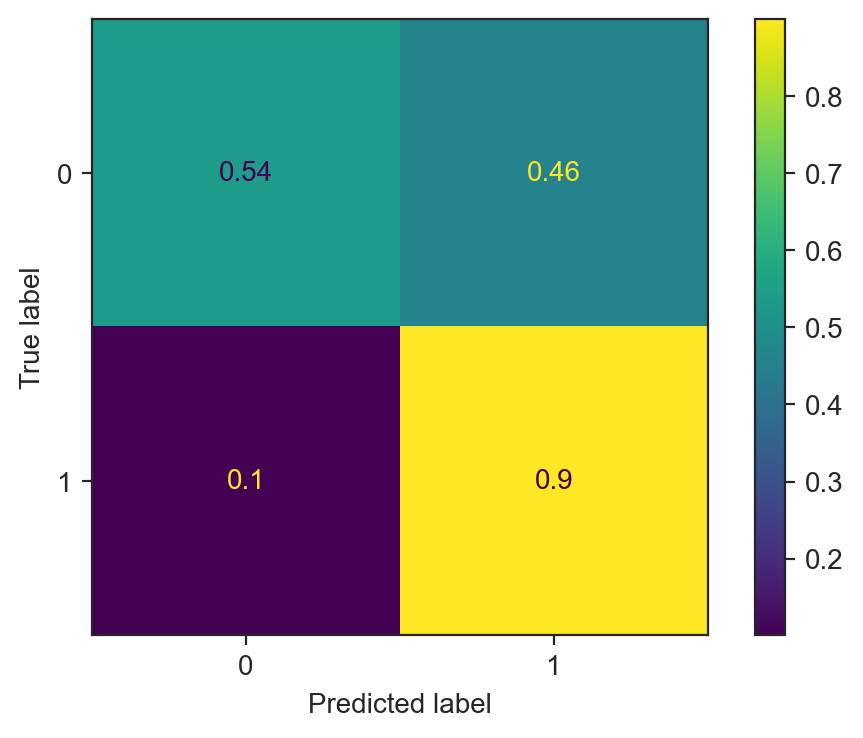

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_val,lgc.predict(X_val_scale),normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
from sklearn.metrics import accuracy_score

y_val_pred = lgc.predict(X_val_scale)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_accuracy

0.7877428998505231

### **Sequential feature selection**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector

# Create a StratifiedKFold cross-validation object
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize your Logistic Regression model
lgc = LogisticRegression(multi_class='ovr', solver='liblinear')

# Initialize the Sequential Feature Selector
sfs = SequentialFeatureSelector(lgc,
                                k_features='best',  # Select the best subset of features
                                forward=True,        # Forward selection (you can also try backward=False)
                                scoring='accuracy',  # Use accuracy as the evaluation metric
                                cv=kfold)

# Fit the SFS to your training data
sfs.fit(X_train_scale, y_train)

# Get the selected feature indices
selected_features_indices = np.array(sfs.k_feature_idx_)

# Get the names of the selected features
selected_feature_names = X_train_scale.columns[selected_features_indices]

# Select the features from your training data
X_train_selected = X_train_scale[selected_feature_names]

# Train your Logistic Regression model on the selected features
lgc.fit(X_train_selected, y_train)

# Print the selected feature names
print("Selected feature names:", selected_feature_names)


Selected feature names: Index(['HS', 'AS', 'HST', 'AST', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AvgH',
       'Max<2.5', 'Avg<2.5', 'TGD', 'Elo_Before_Away', 'Days_D', 'SP_diff',
       'MW', 'Year', 'Overall_diff', 'Attack_diff', 'Midfield_diff',
       'Defence_diff'],
      dtype='object')


In [ ]:

# evaluate the model on your validation or test set
X_val_selected = X_val_scale[selected_feature_names]
y_val_pred = lgc.predict(X_val_selected)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_accuracy

0.7847533632286996

### **gridsearchCV**

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import  make_scorer,f1_score,precision_score,recall_score


param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'class_weight': ['balanced', None]
}


lg = LogisticRegression(multi_class='ovr', solver='liblinear')

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store cross-validation results
cv_scores = []

# Iterate over the cross-validation folds
for train_idx, val_idx in kfold.split(X_train_selected, y_train):
    # Split the training data into training and validation sets for the fold
    X_train_fold, X_val_fold = X_train_selected.iloc[train_idx], X_train_selected.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]


smote = SMOTE(sampling_strategy='auto', random_state=42)

scorer = make_scorer(f1_score, average='weighted')

grid_search = GridSearchCV(estimator=lg, param_grid=param_grid, scoring=scorer, cv=kfold,return_train_score=True)

X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)

grid_search.fit(X_train_fold_resampled, y_train_fold_resampled)


best_estimator = grid_search.best_estimator_

In [ ]:
y_val_fold.value_counts()

NA    367
A     168
Name: ANA, dtype: int64

In [ ]:
y_train.value_counts()

NA    1833
A      842
Name: ANA, dtype: int64

In [ ]:
y_train_fold_resampled.value_counts()

A     1466
NA    1466
Name: ANA, dtype: int64

In [ ]:
grid_search.best_score_

0.7631991660005352

In [ ]:
grid_search.best_params_

{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1'}

In [ ]:
grid_search.best_index_

8

In [ ]:
lg_results = pd.DataFrame(grid_search.cv_results_).sort_values('rank_test_score')

In [ ]:
lg_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'param_class_weight', 'param_penalty', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [ ]:
lg_results[['param_C', 'param_class_weight', 'param_penalty','mean_train_score','mean_test_score','rank_test_score']]

,param_C,param_class_weight,param_penalty,mean_train_score,mean_test_score,rank_test_score
10,0.1,None,l1,0.768988,0.763199,1
8,0.1,balanced,l1,0.768988,0.763199,1
19,10,None,l2,0.770369,0.762862,3
17,10,balanced,l2,0.770369,0.762520,4
16,10,balanced,l1,0.770540,0.762517,5
18,10,None,l1,0.770625,0.762179,6
15,1,None,l2,0.771478,0.762171,7
13,1,balanced,l2,0.771478,0.762171,7
11,0.1,None,l2,0.770966,0.762165,9
9,0.1,balanced,l2,0.771051,0.762165,9


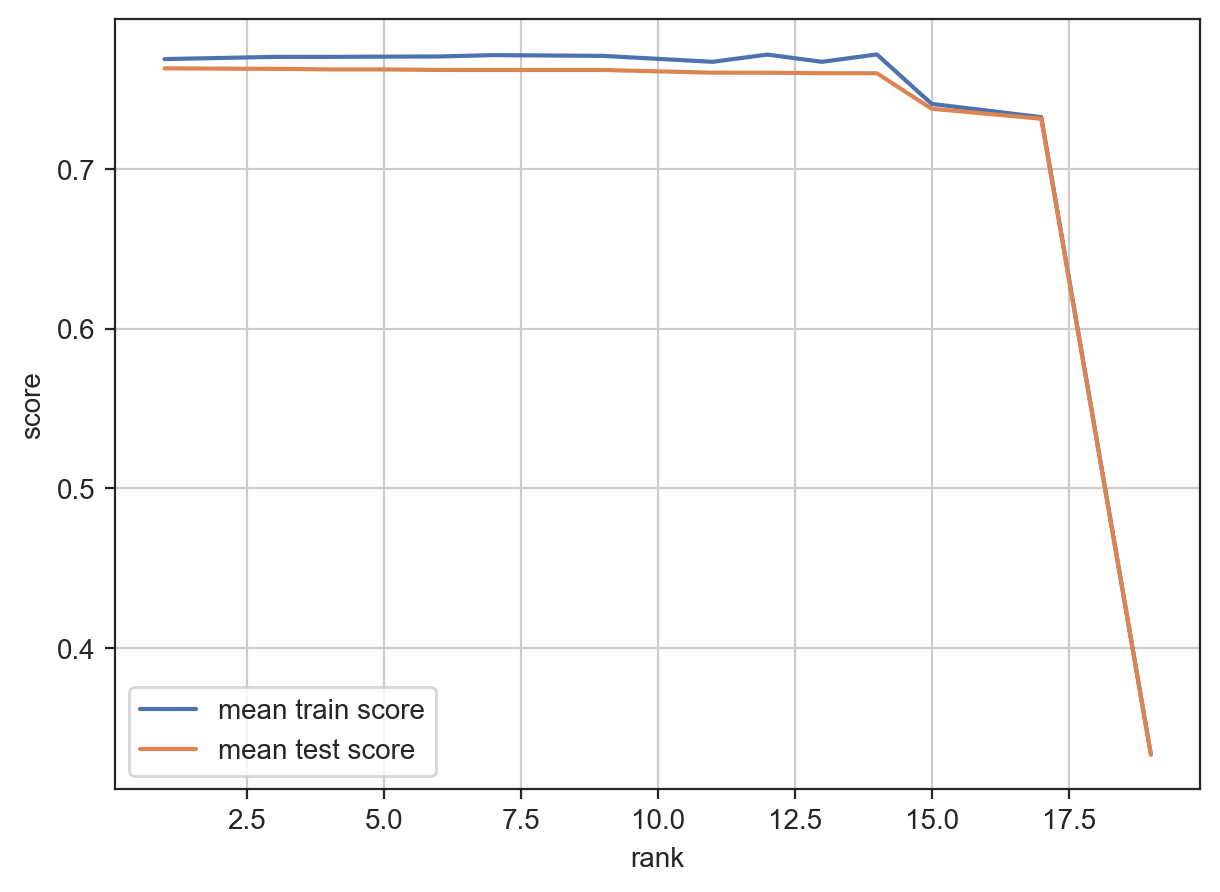

In [ ]:
fig,ax = plt.subplots(figsize=(7,5))
sns.lineplot(data=lg_results,x='rank_test_score',y='mean_train_score',ax=ax,ci=None)
sns.lineplot(data=lg_results,x='rank_test_score',y='mean_test_score',ax=ax,ci=None)
ax.legend(['mean train score','mean test score'])
ax.set_xlabel('rank')
ax.set_ylabel('score')
plt.grid(visible=True)

In [ ]:
winning_lgc = grid_search.best_estimator_

In [ ]:
from sklearn.metrics import classification_report

y_pred_lg = winning_lgc.predict(X_val_selected)
class_report_lg = classification_report(y_val, y_pred_lg)
print("\nClassification Report:")
print(class_report_lg)


Classification Report:
              precision    recall  f1-score   support

           A       0.58      0.74      0.65       210
          NA       0.86      0.75      0.80       459

    accuracy                           0.75       669
   macro avg       0.72      0.75      0.73       669
weighted avg       0.77      0.75      0.76       669



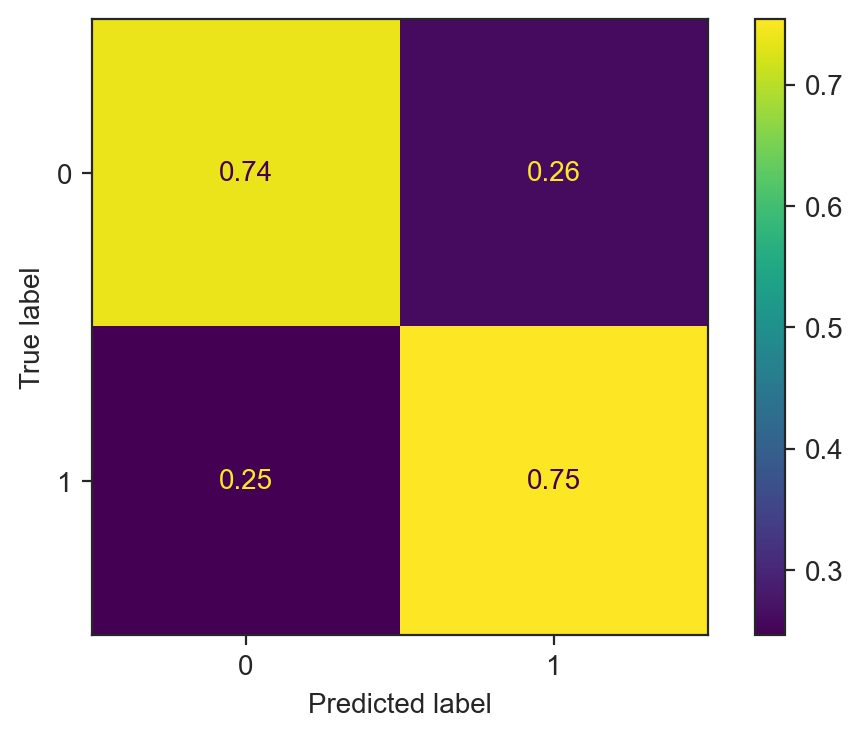

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_val,winning_lgc.predict(X_val_selected),normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
# evaluate the model on your validation or test set
X_val_selected = X_val_scale[selected_feature_names]
y_val_pred = winning_lgc.predict(X_val_selected)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_accuracy

0.7488789237668162

## **RandomForest Classifier**

### **Fitting a simple model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred_rfc = rfc.predict(X_val)
class_report_rfc = classification_report(y_val, y_pred_rfc)
print("\nClassification Report:")
print(class_report_rfc)


Classification Report:
              precision    recall  f1-score   support

           A       0.66      0.50      0.57       210
          NA       0.79      0.88      0.84       459

    accuracy                           0.76       669
   macro avg       0.73      0.69      0.70       669
weighted avg       0.75      0.76      0.75       669



In [ ]:
from sklearn.metrics import accuracy_score

y_val_pred = rfc.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_accuracy

0.7623318385650224

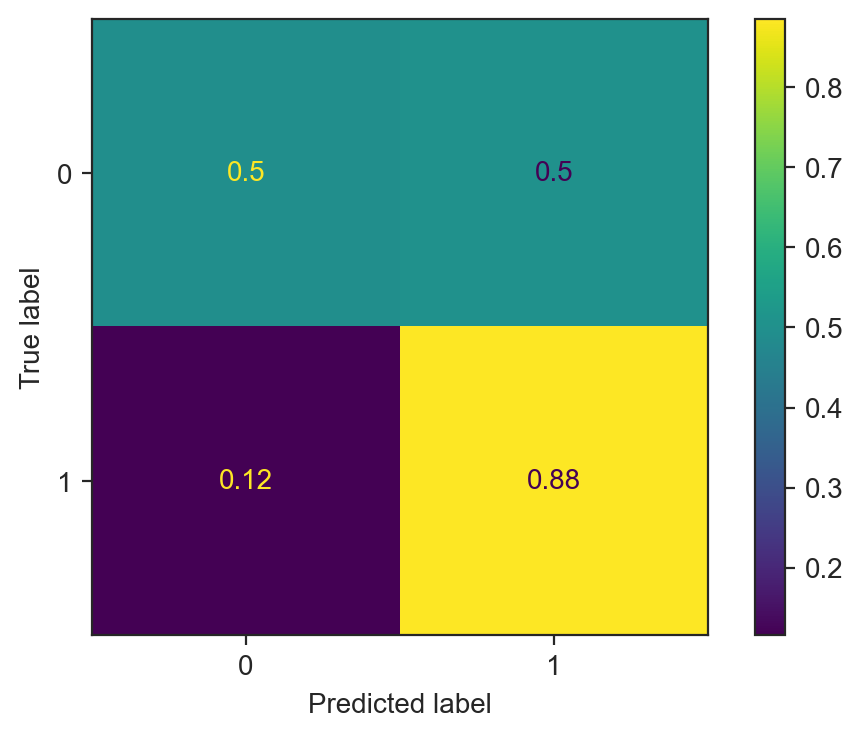

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_val,rfc.predict(X_val),normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

### **Sequential feature selection**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector

# Create a StratifiedKFold cross-validation object
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize Random Forest model
rfc = RandomForestClassifier()

# Initialize the Sequential Feature Selector
sfs = SequentialFeatureSelector(rfc,
                                k_features='best',  # Select the best subset of features
                                forward=True,        # Forward selection (you can also try backward=False)
                                scoring='accuracy',  # Use accuracy as the evaluation metric
                                cv=kfold)

# Fit the rfc to your training data
sfs.fit(X_train_scale, y_train)

# Get the selected feature indices
selected_features_indices = np.array(sfs.k_feature_idx_)

# Get the names of the selected features
selected_feature_names = X_train.columns[selected_features_indices]

# Select the features from your training data
X_train_selected = X_train[selected_feature_names]

# Train your Logistic Regression model on the selected features
rfc.fit(X_train_selected, y_train)

# Print the selected feature names
print("Selected feature names:", selected_feature_names)


Selected feature names: Index(['AS', 'HST', 'AST', 'AF', 'AC', 'HY', 'AY', 'HR', 'AR', 'AvgA', 'TGD',
       'Elo_Before_Home', 'Elo_Before_Away', 'form_diff'],
      dtype='object')


In [ ]:

# evaluate the model on your validation or test set
X_val_selected = X_val[selected_feature_names]
y_val_pred = rfc.predict(X_val_selected)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_accuracy

0.772795216741405

### **gridsearchCV**

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import  make_scorer,f1_score,precision_score,recall_score


param_grid = {
    'n_estimators': [5,10,50,100],
    'max_depth': [3,5,8,10,20],
    'min_samples_split': [2,5,8,10,20],
    'min_samples_leaf':[2,5,10,20],
    'n_jobs':[-1],
    'random_state':[42]
}


rfc = RandomForestClassifier()

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store cross-validation results
cv_scores = []

# Iterate over the cross-validation folds
for train_idx, val_idx in kfold.split(X_train_selected, y_train):
    # Split the training data into training and validation sets for the fold
    X_train_fold, X_val_fold = X_train_selected.iloc[train_idx], X_train_selected.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]


smote = SMOTE(sampling_strategy='auto', random_state=42)

scorer = make_scorer(f1_score, average='weighted')

grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring=scorer, cv=kfold, return_train_score=True)

X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)

grid_search.fit(X_train_fold_resampled, y_train_fold_resampled)


best_estimator = grid_search.best_estimator_

In [ ]:
y_val_fold.value_counts()

NA    367
A     168
Name: ANA, dtype: int64

In [ ]:
y_train.value_counts()

NA    1833
A      842
Name: ANA, dtype: int64

In [ ]:
y_train_fold_resampled.value_counts()

A     1466
NA    1466
Name: ANA, dtype: int64

In [ ]:
grid_search.best_score_

0.8215173942817934

In [ ]:
grid_search.best_params_

{'max_depth': 20,
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'n_estimators': 50,
 'n_jobs': -1,
 'random_state': 42}

In [ ]:
grid_search.best_index_

330

In [ ]:
rfc_results = pd.DataFrame(grid_search.cv_results_).sort_values('rank_test_score')

In [ ]:
rfc_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split',
       'param_n_estimators', 'param_n_jobs', 'param_random_state', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [ ]:
rfc_results[['param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split','param_n_estimators','mean_train_score','mean_test_score','rank_test_score']]

,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_train_score,mean_test_score,rank_test_score
330,20,2,8,50,0.970582,0.821517,1
334,20,2,10,50,0.961117,0.821193,2
322,20,2,2,50,0.989512,0.820867,3
323,20,2,2,100,0.991303,0.820537,4
327,20,2,5,100,0.986869,0.819848,5
...,...,...,...,...,...,...,...
20,3,5,2,5,0.752613,0.732705,386
4,3,2,5,5,0.752613,0.732705,386
16,3,2,20,5,0.752613,0.732705,386
40,3,10,2,5,0.752528,0.732705,386


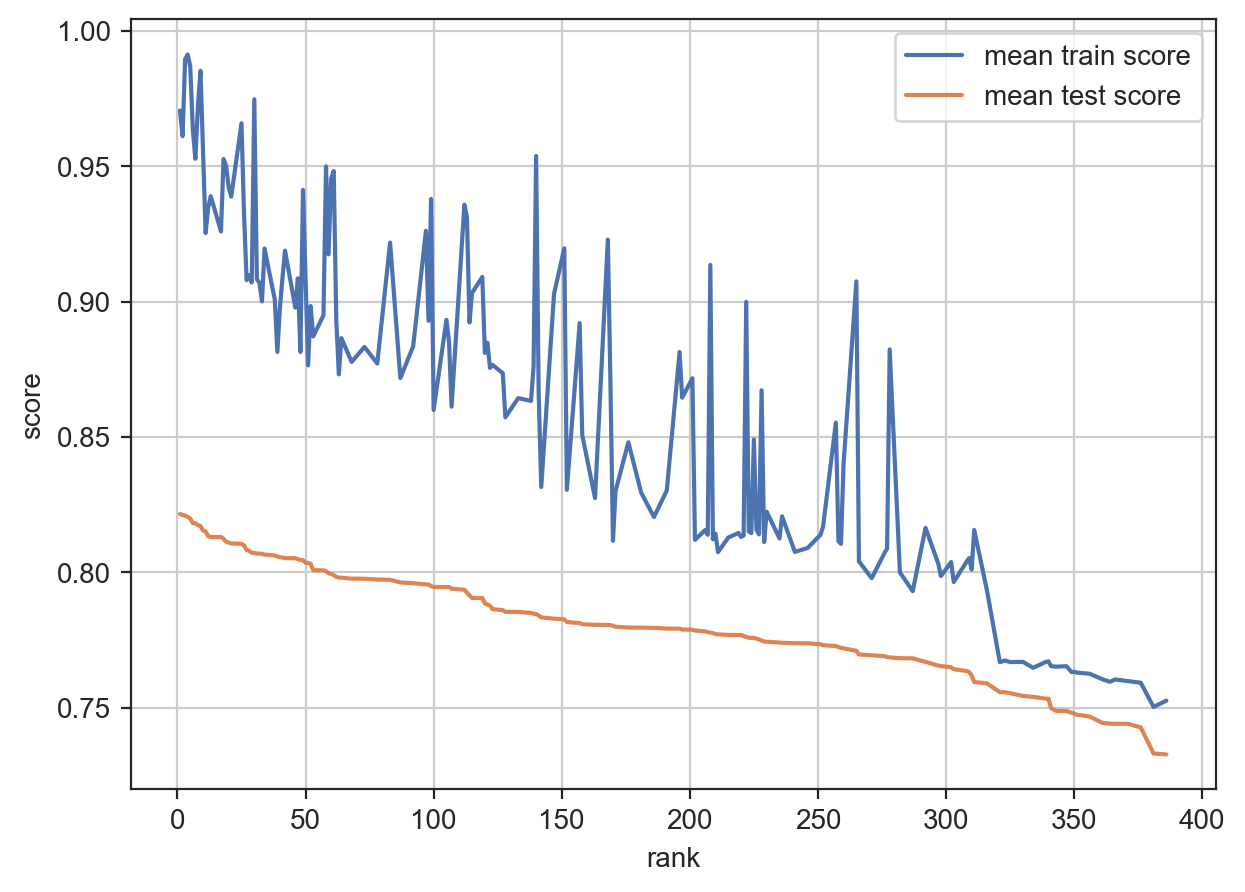

In [ ]:
fig,ax = plt.subplots(figsize=(7,5))
sns.lineplot(data=rfc_results,x='rank_test_score',y='mean_train_score',ax=ax,ci=None)
sns.lineplot(data=rfc_results,x='rank_test_score',y='mean_test_score',ax=ax,ci=None)
ax.legend(['mean train score','mean test score'])
ax.set_xlabel('rank')
ax.set_ylabel('score')
plt.grid(visible=True)

In [ ]:
winning_rfc = grid_search.best_estimator_

In [ ]:
winning_rfc

RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=8,
                       n_estimators=50, n_jobs=-1, random_state=42)

In [ ]:
from sklearn.metrics import classification_report

y_pred_lg = winning_rfc.predict(X_val_selected)
class_report_lg = classification_report(y_val, y_pred_lg)
print("\nClassification Report:")
print(class_report_lg)


Classification Report:
              precision    recall  f1-score   support

           A       0.63      0.62      0.63       210
          NA       0.83      0.83      0.83       459

    accuracy                           0.77       669
   macro avg       0.73      0.73      0.73       669
weighted avg       0.77      0.77      0.77       669



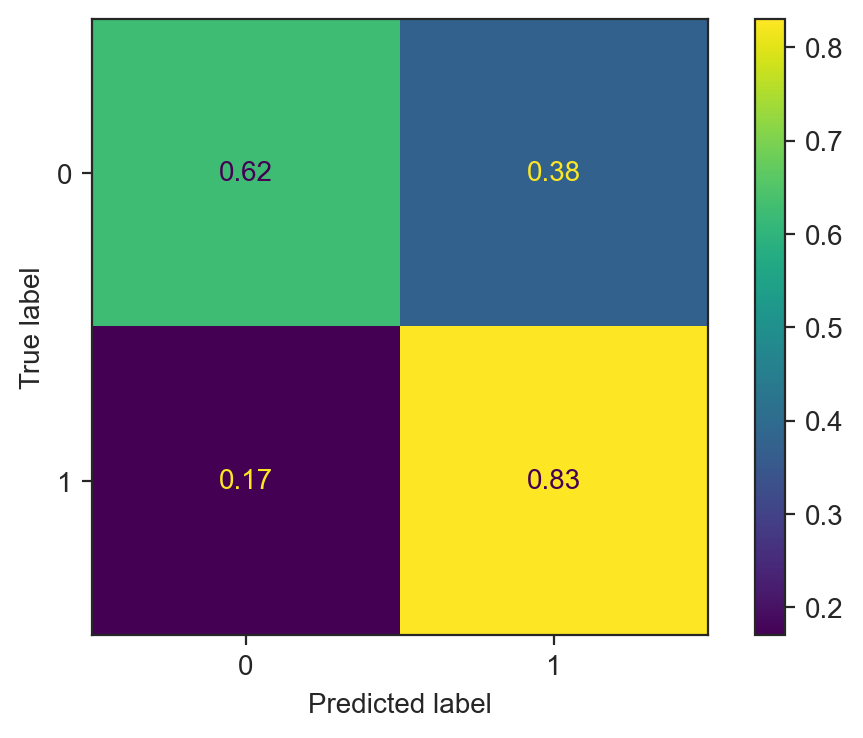

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_val,winning_rfc.predict(X_val_selected),normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
# evaluate the model on your validation or test set
X_val_selected = X_val[selected_feature_names]
y_val_pred = winning_rfc.predict(X_val_selected)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_accuracy

0.7653213751868461

In [ ]:
rfc_results['diff']=abs(rfc_results['mean_train_score']-rfc_results['mean_test_score'])

sorted_table = rfc_results[['param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split',\
                            'param_n_estimators','mean_train_score','mean_test_score','diff','rank_test_score']]\
                            .sort_values(by=['diff', 'mean_test_score'], ascending=[True, False])
sorted_table

,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_train_score,mean_test_score,diff,rank_test_score
71,3,20,8,100,0.764705,0.753965,0.010740,334
67,3,20,5,100,0.764705,0.753965,0.010740,334
63,3,20,2,100,0.764705,0.753965,0.010740,334
79,3,20,20,100,0.764705,0.753965,0.010740,334
75,3,20,10,100,0.764705,0.753965,0.010740,334
...,...,...,...,...,...,...,...,...
321,20,2,2,10,0.974762,0.807156,0.167606,30
326,20,2,5,50,0.985249,0.817072,0.168177,9
322,20,2,2,50,0.989512,0.820867,0.168645,3
320,20,2,2,5,0.953785,0.784601,0.169185,140


In [ ]:
# Select the top model (small gap and high test score)
first_model = sorted_table.iloc[0]

# Display the first model's information
print("first Model:")
print(first_model)

first Model:
param_max_depth                   3
param_min_samples_leaf           20
param_min_samples_split           8
param_n_estimators              100
mean_train_score           0.764705
mean_test_score            0.753965
diff                        0.01074
rank_test_score                 334
Name: 71, dtype: object


In [ ]:
X_val_selected = X_val[['AS', 'HST', 'AST', 'AF', 'AC', 'HY', 'AY', 'HR', 'AR', 'AvgA', 'TGD',
       'Elo_Before_Home', 'Elo_Before_Away', 'form_diff']]

X_train_selected = X_train[['AS', 'HST', 'AST', 'AF', 'AC', 'HY', 'AY', 'HR', 'AR', 'AvgA', 'TGD',
       'Elo_Before_Home', 'Elo_Before_Away', 'form_diff']]

In [ ]:
# Define hyperparameters for the first model (adjust these values based on your first model)
first_model_hyperparameters = {
    'max_depth': 3,
    'min_samples_leaf': 2,
    'min_samples_split': 5,
    'n_estimators': 5
}

# Create a new instance of the RandomForestClassifier with the first model's hyperparameters
first_rfc = RandomForestClassifier(**first_model_hyperparameters)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store cross-validation results
cv_scores = []

# Iterate over the cross-validation folds
for train_idx, val_idx in kfold.split(X_train_selected, y_train):
    # Split the training data into training and validation sets for the fold
    X_train_fold, X_val_fold = X_train_selected.iloc[train_idx], X_train_selected.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]


smote = SMOTE(sampling_strategy='auto', random_state=42)

X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)

first_rfc.fit(X_train_fold_resampled, y_train_fold_resampled)

# # Use the first model estimator to make predictions
# X_val_selected = X_val[selected_feature_names]
# y_val_pred = first_rfc.predict(X_val_selected)

# # Calculate the validation accuracy
# val_accuracy = accuracy_score(y_val, y_val_pred)

# # Print the validation accuracy
# print("Validation Accuracy:", val_accuracy)


RandomForestClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=5)

In [ ]:
X_train_fold_resampled.columns

Index(['AS', 'HST', 'AST', 'AF', 'AC', 'HY', 'AY', 'HR', 'AR', 'AvgA', 'TGD',
       'Elo_Before_Home', 'Elo_Before_Away', 'form_diff'],
      dtype='object')

In [ ]:
X_val_selected.columns

Index(['AS', 'HST', 'AST', 'AF', 'AC', 'HY', 'AY', 'HR', 'AR', 'AvgA', 'TGD',
       'Elo_Before_Home', 'Elo_Before_Away', 'form_diff'],
      dtype='object')

In [ ]:
# from sklearn.metrics import classification_report

y_pred_rfc = first_rfc.predict(X_val_selected)
class_report_rfc = classification_report(y_val, y_pred_rfc, zero_division='warn')
print("\nClassification Report:")
print(class_report_rfc)



Classification Report:
              precision    recall  f1-score   support

           A       0.50      0.74      0.60       210
          NA       0.85      0.66      0.74       459

    accuracy                           0.69       669
   macro avg       0.67      0.70      0.67       669
weighted avg       0.74      0.69      0.70       669



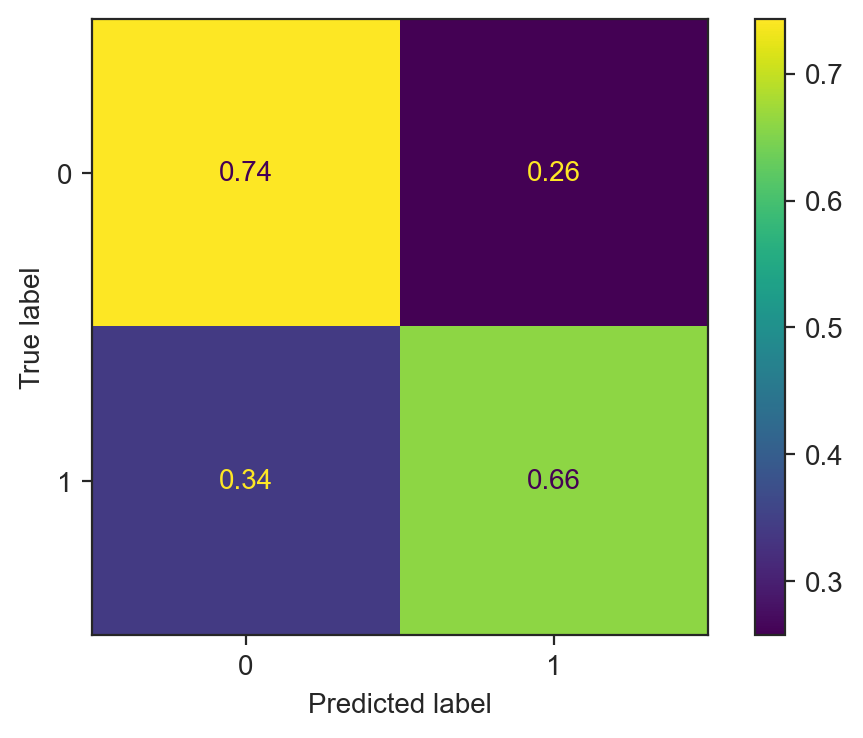

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_val,first_rfc.predict(X_val_selected),normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
# # Calculate the index of the middle row
# middle_index = len(sorted_table) // 2

# # Select the model from the middle
# middle_model = sorted_table.iloc[middle_index]
# middle_model

In [ ]:
# # Define hyperparameters for the middle model (adjust these values based on your middle model)
# middle_model_hyperparameters = {
#     'max_depth': 20,
#     'min_samples_leaf': 20,
#     'min_samples_split': 10,
#     'n_estimators': 10
# }

# # Create a new instance of the RandomForestClassifier with the middle model's hyperparameters
# middle_rfc = RandomForestClassifier(**middle_model_hyperparameters)

# # Fit the model to your training data
# middle_rfc.fit(X_train_selected, y_train)

# # Use the middle model estimator to make predictions
# X_val_selected = X_val[selected_feature_names]
# y_val_pred = middle_rfc.predict(X_val_selected)

# # Calculate the validation accuracy
# val_accuracy = accuracy_score(y_val, y_val_pred)

# # Print the validation accuracy
# print("Validation Accuracy:", val_accuracy)


In [ ]:
# from sklearn.metrics import classification_report

# y_pred_lg = middle_rfc.predict(X_val_selected)
# class_report_lg = classification_report(y_val, y_pred_lg)
# print("\nClassification Report:")
# print(class_report_lg)

## **HistGradientBoosting classifier**

### **Fitting a simple model**

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [ ]:
hgc = HistGradientBoostingClassifier()

In [ ]:
hgc.fit(X_train,y_train)

HistGradientBoostingClassifier()

In [ ]:
from sklearn.metrics import classification_report

y_pred_hgc = hgc.predict(X_val)
class_report_hgc = classification_report(y_val, y_pred_hgc)
print("\nClassification Report:")
print(class_report_hgc)


Classification Report:
              precision    recall  f1-score   support

           A       0.68      0.57      0.62       210
          NA       0.82      0.88      0.85       459

    accuracy                           0.78       669
   macro avg       0.75      0.72      0.73       669
weighted avg       0.77      0.78      0.77       669



In [ ]:
from sklearn.metrics import accuracy_score

y_val_pred = hgc.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_accuracy

0.7802690582959642

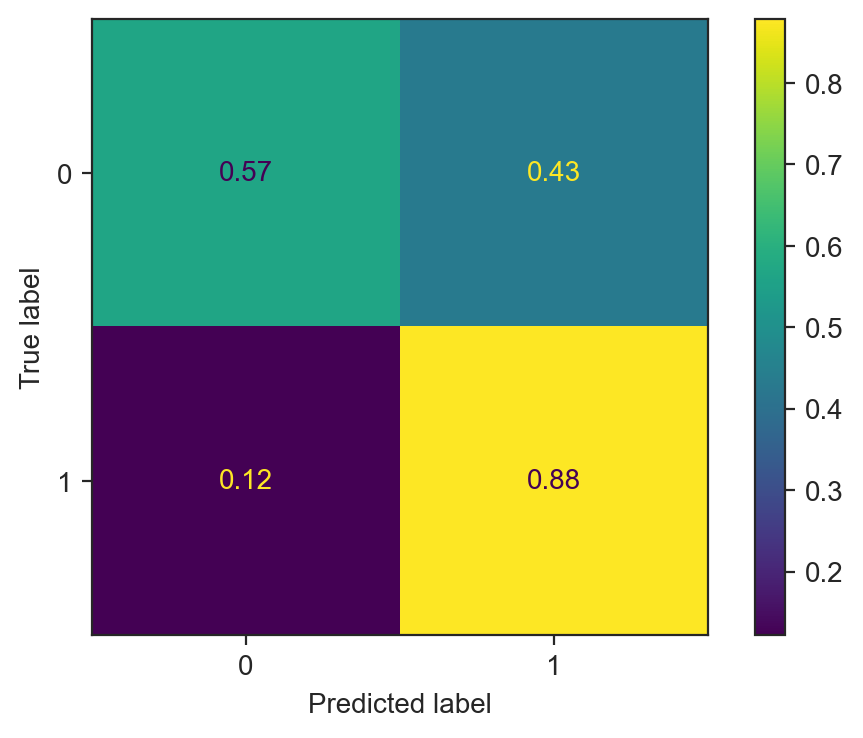

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_val,hgc.predict(X_val),normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

### **Sequential feature selection**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector

# Create a StratifiedKFold cross-validation object
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize Random Forest model
hgc = HistGradientBoostingClassifier()

# Initialize the Sequential Feature Selector
sfs = SequentialFeatureSelector(hgc,
                                k_features='best',  # Select the best subset of features
                                forward=True,        # Forward selection (you can also try backward=False)
                                scoring='accuracy',  # Use accuracy as the evaluation metric
                                cv=kfold)

# Fit the hgc to your training data
sfs.fit(X_train_scale, y_train)

# Get the selected feature indices
selected_features_indices = np.array(sfs.k_feature_idx_)

# Get the names of the selected features
selected_feature_names = X_train.columns[selected_features_indices]

# Select the features from your training data
X_train_selected = X_train[selected_feature_names]

# Train your Logistic Regression model on the selected features
hgc.fit(X_train_selected, y_train)

# Print the selected feature names
print("Selected feature names:", selected_feature_names)


Selected feature names: Index(['HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'HR', 'AR', 'AvgH', 'AvgA',
       'MaxD', 'MaxA', 'Year', 'Max<2.5', 'Avg<2.5', 'TGD', 'SP_diff',
       'Defence_diff'],
      dtype='object')


In [ ]:

# evaluate the model on your validation or test set
X_val_selected = X_val[selected_feature_names]
y_val_pred = hgc.predict(X_val_selected)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_accuracy

0.7623318385650224

In [ ]:
X_train_selected

,HST,AST,HF,AF,HC,AC,HY,HR,AR,AvgH,AvgA,MaxD,MaxA,Year,Max<2.5,Avg<2.5,TGD,SP_diff,Defence_diff
1410,4.0,2.0,8.0,11.0,7.0,3.0,0.0,0.0,0.0,1.360000,9.105000,5.25,10.28,2016,2.17,2.04,28,0.133333,4
3540,6.0,5.0,6.0,12.0,4.0,4.0,1.0,0.0,0.0,1.453333,6.670000,5.00,7.00,2022,2.40,2.33,8,0.466667,3
2216,3.0,0.0,9.0,10.0,3.0,3.0,1.0,0.0,0.0,1.763333,5.133333,3.62,5.55,2018,1.72,1.66,16,0.000000,3
683,6.0,7.0,9.0,6.0,5.0,12.0,0.0,0.0,0.0,1.646667,5.993333,3.92,6.31,2014,2.02,1.92,19,0.400000,2
2849,8.0,3.0,7.0,13.0,3.0,1.0,0.0,0.0,1.0,7.948333,1.388333,5.00,1.42,2020,2.58,2.41,-26,-0.133333,-6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,8.0,5.0,6.0,5.0,3.0,6.0,1.0,0.0,0.0,2.458333,2.958333,3.53,3.05,2014,2.01,1.91,-2,0.666667,-2
3763,5.0,4.0,4.0,6.0,3.0,8.0,1.0,0.0,0.0,1.738333,4.535000,4.08,4.61,2022,2.16,2.09,10,-0.400000,9
2242,5.0,6.0,6.0,5.0,3.0,4.0,1.0,0.0,0.0,6.376667,1.550000,4.35,1.57,2018,2.17,2.10,-53,-0.733333,-8
1026,6.0,6.0,15.0,12.0,3.0,5.0,1.0,0.0,0.0,4.620000,1.813333,3.98,1.85,2015,2.25,2.11,-23,-0.466667,-3


### **gridsearchCV**

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import HistGradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import  make_scorer,f1_score,precision_score,recall_score


param_grid = {
    'max_iter': [50,100,200],
    'max_depth': [3,5,8,10,20],
    'max_leaf_nodes': [20, 50, 100, 200],
    'min_samples_leaf':[2,5,10,20],
    'random_state':[42],
    'learning_rate': [0.1, 0.5],
    'l2_regularization': [0,0.1,0.01]

}


hgc = HistGradientBoostingClassifier()

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store cross-validation results
cv_scores = []

# Iterate over the cross-validation folds
for train_idx, val_idx in kfold.split(X_train_selected, y_train):
    # Split the training data into training and validation sets for the fold
    X_train_fold, X_val_fold = X_train_selected.iloc[train_idx], X_train_selected.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]


smote = SMOTE(sampling_strategy='auto', random_state=42)

scorer = make_scorer(f1_score, average='weighted')

grid_search = GridSearchCV(estimator=hgc, param_grid=param_grid, scoring=scorer, cv=kfold, return_train_score=True)

X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)

grid_search.fit(X_train_fold_resampled, y_train_fold_resampled)


best_estimator = grid_search.best_estimator_

In [ ]:
y_val_fold.value_counts()

NA    367
A     168
Name: ANA, dtype: int64

In [ ]:
y_train.value_counts()

NA    1833
A      842
Name: ANA, dtype: int64

In [ ]:
y_train_fold_resampled.value_counts()

A     1466
NA    1466
Name: ANA, dtype: int64

In [ ]:
grid_search.best_score_

0.8468338504875461

In [ ]:
grid_search.best_params_

{'l2_regularization': 0.1,
 'learning_rate': 0.5,
 'max_depth': 10,
 'max_iter': 200,
 'max_leaf_nodes': 100,
 'min_samples_leaf': 5,
 'random_state': 42}

In [ ]:
grid_search.best_index_

905

In [ ]:
hgb_results = pd.DataFrame(grid_search.cv_results_).sort_values('rank_test_score')

In [ ]:
hgb_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_l2_regularization', 'param_learning_rate', 'param_max_depth',
       'param_max_iter', 'param_max_leaf_nodes', 'param_min_samples_leaf',
       'param_random_state', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

In [ ]:
hgb_results[['param_max_iter', 'param_max_depth', 'param_max_leaf_nodes','param_min_samples_leaf','param_learning_rate','param_l2_regularization','mean_train_score','mean_test_score','rank_test_score']]

,param_max_iter,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_learning_rate,param_l2_regularization,mean_train_score,mean_test_score,rank_test_score
905,200,10,100,5,0.5,0.1,1.000000,0.846834,1
380,200,8,200,2,0.5,0,1.000000,0.846159,2
1324,100,8,200,2,0.5,0.01,1.000000,0.846130,3
1372,100,10,200,2,0.5,0.01,1.000000,0.845481,4
408,100,10,100,2,0.5,0,1.000000,0.845133,5
...,...,...,...,...,...,...,...,...,...
964,50,3,50,2,0.1,0.01,0.849912,0.809169,1436
968,50,3,100,2,0.1,0.01,0.849912,0.809169,1436
960,50,3,20,2,0.1,0.01,0.849912,0.809169,1436
972,50,3,200,2,0.1,0.01,0.849912,0.809169,1436


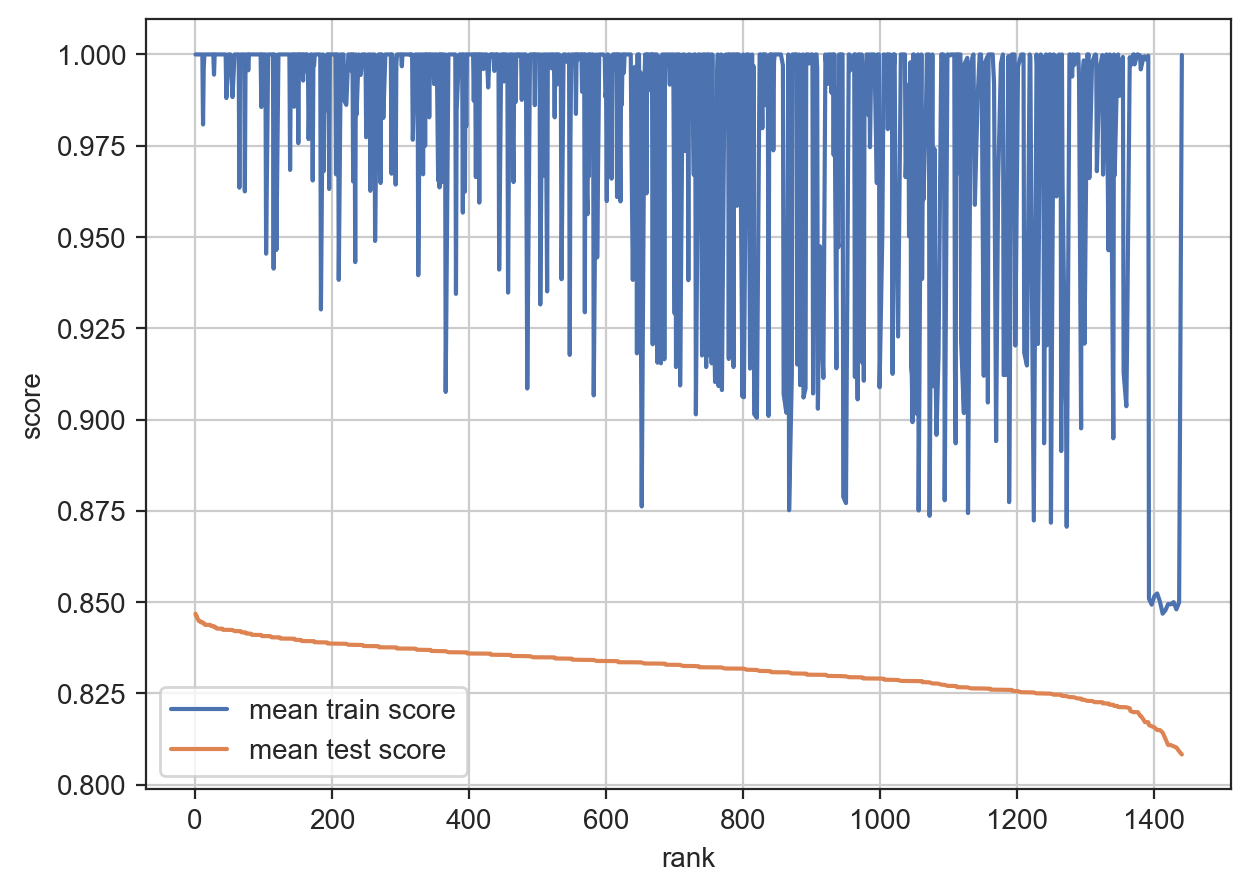

In [ ]:
fig,ax = plt.subplots(figsize=(7,5))
sns.lineplot(data=hgb_results,x='rank_test_score',y='mean_train_score',ax=ax,ci=None)
sns.lineplot(data=hgb_results,x='rank_test_score',y='mean_test_score',ax=ax,ci=None)
ax.legend(['mean train score','mean test score'])
ax.set_xlabel('rank')
ax.set_ylabel('score')
plt.grid(visible=True)

In [ ]:
winning_hgb = grid_search.best_estimator_

In [ ]:
winning_hgb

HistGradientBoostingClassifier(l2_regularization=0.1, learning_rate=0.5,
                               max_depth=10, max_iter=200, max_leaf_nodes=100,
                               min_samples_leaf=5, random_state=42)

In [ ]:
from sklearn.metrics import classification_report

y_pred_hgb = winning_hgb.predict(X_val_selected)
class_report_hgb = classification_report(y_val, y_pred_hgb)
print("\nClassification Report:")
print(class_report_hgb)


Classification Report:
              precision    recall  f1-score   support

           A       0.61      0.62      0.62       210
          NA       0.82      0.82      0.82       459

    accuracy                           0.76       669
   macro avg       0.72      0.72      0.72       669
weighted avg       0.76      0.76      0.76       669



In [ ]:
X_val_selected

,HST,AST,HF,AF,HC,AC,HY,HR,AR,AvgH,AvgA,MaxD,MaxA,Year,Max<2.5,Avg<2.5,TGD,SP_diff,Defence_diff
3238,2.0,7.0,9.0,11.0,1.0,2.0,1.0,0.0,0.0,3.213333,2.216667,3.70,2.250,2021,2.14,2.04,3,0.533333,-5
3968,8.0,3.0,13.0,4.0,9.0,9.0,3.0,0.0,0.0,1.303333,10.443333,5.70,11.660,2023,2.38,2.27,20,0.133333,4
2135,9.0,4.0,5.0,10.0,18.0,0.0,0.0,0.0,0.0,1.128333,22.260000,10.21,26.000,2018,3.75,3.50,60,0.133333,6
333,9.0,6.0,8.0,12.0,8.0,8.0,2.0,0.0,0.0,1.726667,5.046667,3.85,5.430,2013,2.05,1.96,6,0.133333,2
2003,5.0,3.0,15.0,15.0,5.0,5.0,1.0,0.0,0.0,1.435000,7.081667,5.50,7.690,2018,3.65,3.10,23,0.200000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2330,5.0,6.0,17.0,12.0,5.0,9.0,2.0,0.0,0.0,1.463333,6.813333,5.00,7.500,2019,2.88,2.75,2,0.200000,2
749,8.0,3.0,10.0,16.0,10.0,6.0,0.0,0.0,1.0,4.113333,1.908667,3.76,1.952,2014,2.28,2.15,-14,-0.466667,-6
3346,2.0,5.0,9.0,6.0,2.0,4.0,1.0,0.0,0.0,6.318333,1.576667,4.10,1.630,2021,1.89,1.82,-40,-0.333333,-1
1342,2.0,6.0,13.0,8.0,7.0,7.0,3.0,0.0,0.0,1.436667,8.390000,4.58,9.000,2016,1.87,1.81,2,0.066667,10


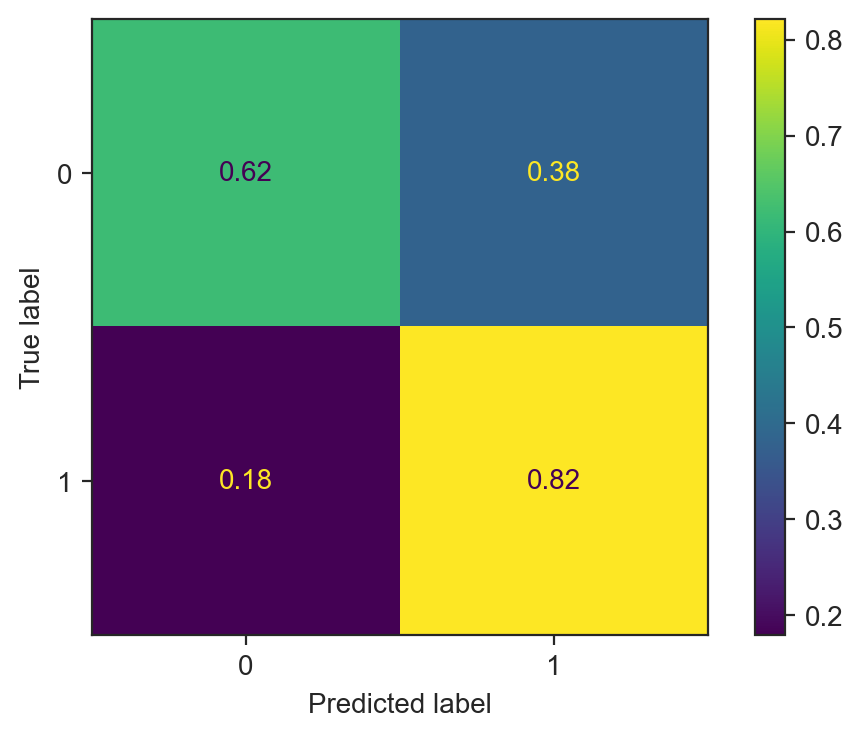

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_val,winning_hgb.predict(X_val_selected),normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
hgb_results['diff']=abs(hgb_results['mean_train_score']-hgb_results['mean_test_score'])

sorted_table = hgb_results[['param_l2_regularization', 'param_learning_rate', 'param_max_depth',\
       'param_max_iter', 'param_max_leaf_nodes', 'param_min_samples_leaf','mean_train_score','mean_test_score','diff','rank_test_score']]\
                            .sort_values(by=['diff', 'mean_test_score'], ascending=[True, False])
sorted_table

,param_l2_regularization,param_learning_rate,param_max_depth,param_max_iter,param_max_leaf_nodes,param_min_samples_leaf,mean_train_score,mean_test_score,diff,rank_test_score
971,0.01,0.1,3,50,100,20,0.846839,0.814290,0.032549,1412
963,0.01,0.1,3,50,20,20,0.846839,0.814290,0.032549,1412
975,0.01,0.1,3,50,200,20,0.846839,0.814290,0.032549,1412
967,0.01,0.1,3,50,50,20,0.846839,0.814290,0.032549,1412
970,0.01,0.1,3,50,100,10,0.849316,0.815991,0.033324,1396
...,...,...,...,...,...,...,...,...,...,...
272,0,0.5,3,200,20,2,0.998636,0.817122,0.181514,1387
912,0.1,0.5,20,50,20,2,0.999403,0.817496,0.181907,1385
337,0,0.5,8,50,20,5,0.999488,0.817153,0.182335,1386
1344,0.01,0.5,10,50,20,2,0.999659,0.817119,0.182540,1391


In [ ]:
sorted_table.iloc[0]

param_l2_regularization        0.01
param_learning_rate             0.1
param_max_depth                   3
param_max_iter                   50
param_max_leaf_nodes            100
param_min_samples_leaf           20
mean_train_score           0.846839
mean_test_score             0.81429
diff                       0.032549
rank_test_score                1412
Name: 971, dtype: object

In [ ]:
# Select the top model (small gap and high test score)
first_model = sorted_table.iloc[0]

# Display the first model's information
print("first Model:")
print(first_model)

first Model:
param_l2_regularization        0.01
param_learning_rate             0.1
param_max_depth                   3
param_max_iter                   50
param_max_leaf_nodes            100
param_min_samples_leaf           20
mean_train_score           0.846839
mean_test_score             0.81429
diff                       0.032549
rank_test_score                1412
Name: 971, dtype: object


In [ ]:
X_train_selected = X_train[['HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'HR', 'AR', 'AvgH', 'AvgA',\
       'MaxD', 'MaxA', 'Year', 'Max<2.5', 'Avg<2.5', 'TGD', 'SP_diff',\
       'Defence_diff']]

X_val_selected = X_val[['HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'HR', 'AR', 'AvgH', 'AvgA',
       'MaxD', 'MaxA', 'Year', 'Max<2.5', 'Avg<2.5', 'TGD', 'SP_diff',
       'Defence_diff']]

In [ ]:
# Define hyperparameters for the first model (adjust these values based on your first model)
first_model_hyperparameters = {
    'l2_regularization': 0.01,
    'learning_rate': 0.1,
    'max_depth': 3,
    'max_leaf_nodes': 100,
    'min_samples_leaf': 20,
    'max_iter': 50
}

# Create a new instance of the HistGradientBoostingClassifier with the first model's hyperparameters
first_hgb = HistGradientBoostingClassifier(**first_model_hyperparameters)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Iterate over the cross-validation folds
for train_idx, val_idx in kfold.split(X_train_selected, y_train):
    # Split the training data into training and validation sets for the fold
    X_train_fold, X_val_fold = X_train_selected.iloc[train_idx], X_train_selected.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]


smote = SMOTE(sampling_strategy='auto', random_state=42)

X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)

first_hgb.fit(X_train_fold_resampled, y_train_fold_resampled)

y_val_pred = first_hgb.predict(X_val_selected)

# Calculate the validation accuracy
val_accuracy = accuracy_score(y_val, y_val_pred)

# Print the validation accuracy
print("Validation Accuracy:", val_accuracy)


Validation Accuracy: 0.7638266068759342


In [ ]:
from sklearn.metrics import classification_report

y_pred_hgb = first_hgb.predict(X_val_selected)
class_report_hgb = classification_report(y_val, y_pred_hgb)
print("\nClassification Report:")
print(class_report_hgb)


Classification Report:
              precision    recall  f1-score   support

           A       0.61      0.68      0.64       210
          NA       0.85      0.80      0.82       459

    accuracy                           0.76       669
   macro avg       0.73      0.74      0.73       669
weighted avg       0.77      0.76      0.77       669



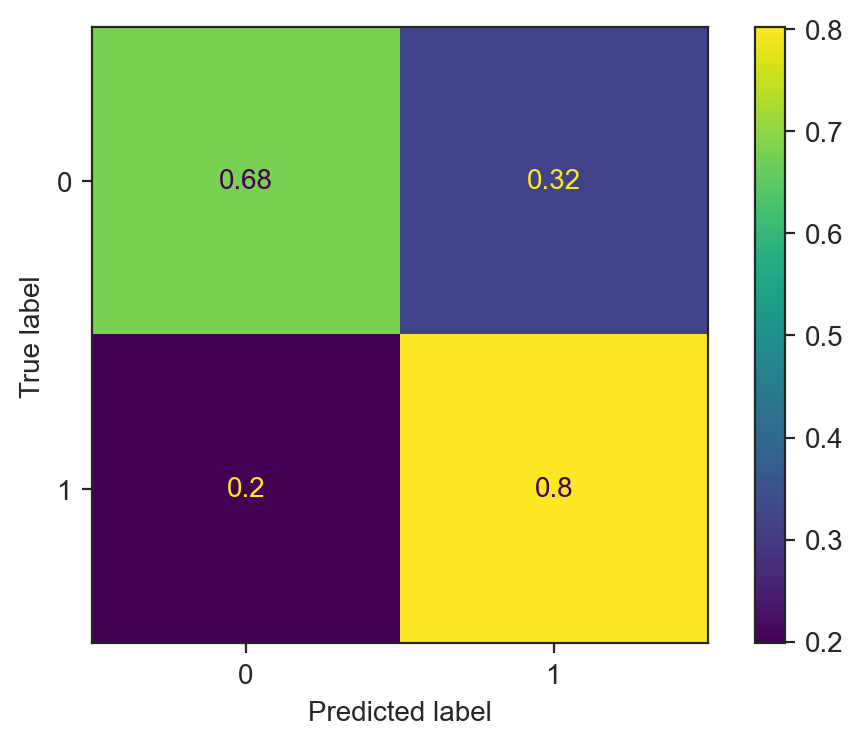

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_val,first_hgb.predict(X_val_selected),normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

## **K- Nearest neighbor**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

### scaling the data

In [ ]:
norm_cols=['MW', 'Year','Overall_diff', 'Attack_diff',\
       'Midfield_diff', 'Defence_diff']

In [ ]:
std_cols = [col for col in X_train.columns if col not in norm_cols]

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,Normalizer

In [ ]:
# Create transformers
stdscaling_transformer = StandardScaler()
normscaling_transformer = Normalizer()

# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("std", stdscaling_transformer, std_cols),
        ("norm", normscaling_transformer, norm_cols)
    ],
    remainder='passthrough'
)

# Apply the transformations and convert back to a pandas DataFrame
X_train_scale = preprocessor.fit_transform(X_train)
X_train_scale = pd.DataFrame(X_train_scale, columns=std_cols + norm_cols)

In [ ]:
X_train_scale.head(5)

,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,...,Elo_Before_Away,Days_D,form_diff,SP_diff,MW,Year,Overall_diff,Attack_diff,Midfield_diff,Defence_diff
0,0.719291,-0.068497,-0.344458,-0.846806,-0.749180,0.007827,0.387640,-0.638109,-1.254484,0.183019,...,-0.807417,-0.004156,1.000239,0.424784,0.013887,0.999891,0.002480,0.002976,0.002480,0.001984
1,1.778528,-0.477947,0.353327,0.371920,-1.338002,0.290761,-0.583881,-0.267115,-0.441167,0.960121,...,-0.979516,-0.004156,0.247957,1.418284,0.006429,0.999972,0.001484,0.001978,0.002473,0.001484
2,0.719291,-1.501574,-0.693351,-1.659291,-0.454769,-0.275107,-0.907721,-0.638109,-0.441167,1.737224,...,-1.451476,2.237324,-0.286267,0.027385,0.015855,0.999872,0.000991,0.000495,0.000991,0.001486
3,-0.869564,1.978756,0.353327,1.184405,-0.454769,-1.406842,-0.260041,2.700834,-1.254484,-1.371187,...,-0.626763,-0.004156,2.359889,1.219584,0.015390,0.999880,0.000496,-0.000496,0.000993,0.000993
4,1.072370,-0.887398,1.051113,-0.440564,-1.043591,0.573695,-0.907721,-1.380096,-1.254484,-0.594084,...,1.793697,-0.004156,-0.195649,-0.370015,0.009405,0.999928,-0.003960,-0.004455,-0.003465,-0.002970


In [ ]:
X_val_scale = preprocessor.fit_transform(X_val)
X_val_scale = pd.DataFrame(X_val_scale, columns=std_cols + norm_cols)

X_val_scale.head(5)

,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,...,Elo_Before_Away,Days_D,form_diff,SP_diff,MW,Year,Overall_diff,Attack_diff,Midfield_diff,Defence_diff
0,-1.958078,0.522275,-1.079245,1.107549,-0.454942,0.063528,-1.612581,-0.989545,-0.418118,0.238479,...,1.069591,0.054890,0.365082,1.684272,0.009896,0.999946,-0.001484,-0.000495,-0.000990,-0.002474
1,0.536394,-0.697988,1.005495,-0.468941,0.783536,-1.843519,0.946889,1.542716,1.303241,-0.543591,...,-1.251670,-0.044089,0.518769,0.467869,0.008403,0.999947,0.002471,0.002966,0.003954,0.001977
2,1.249100,-1.104742,1.352952,-0.074818,-1.693419,-0.208908,3.826293,-1.713048,-1.278797,-0.543591,...,-0.840097,-0.044089,0.994748,0.467869,0.011892,0.999892,0.003964,0.004955,0.004955,0.002973
3,0.892747,0.522275,1.352952,0.713426,-0.764561,0.335963,0.626955,1.180965,0.442562,1.020548,...,-1.771235,0.054890,0.917668,0.467869,0.016888,0.999854,0.000993,0.000000,0.001987,0.000993
4,-0.889019,-1.104742,-0.036875,-0.468941,1.402775,1.153269,-0.332846,0.095710,-0.418118,3.366757,...,0.523247,0.054890,0.258993,0.670603,0.005451,0.999983,0.000000,-0.000991,0.001487,0.000496


### Fitting simple model

In [ ]:
knn.fit(X_train_scale,y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn = knn.predict(X_val_scale)

In [ ]:
from sklearn.metrics import classification_report

y_pred_knn = knn.predict(X_val_scale)
class_report_knn = classification_report(y_val, y_pred_knn)
print("\nClassification Report:")
print(class_report_knn)


Classification Report:
              precision    recall  f1-score   support

           A       0.57      0.46      0.51       210
          NA       0.77      0.84      0.81       459

    accuracy                           0.72       669
   macro avg       0.67      0.65      0.66       669
weighted avg       0.71      0.72      0.71       669



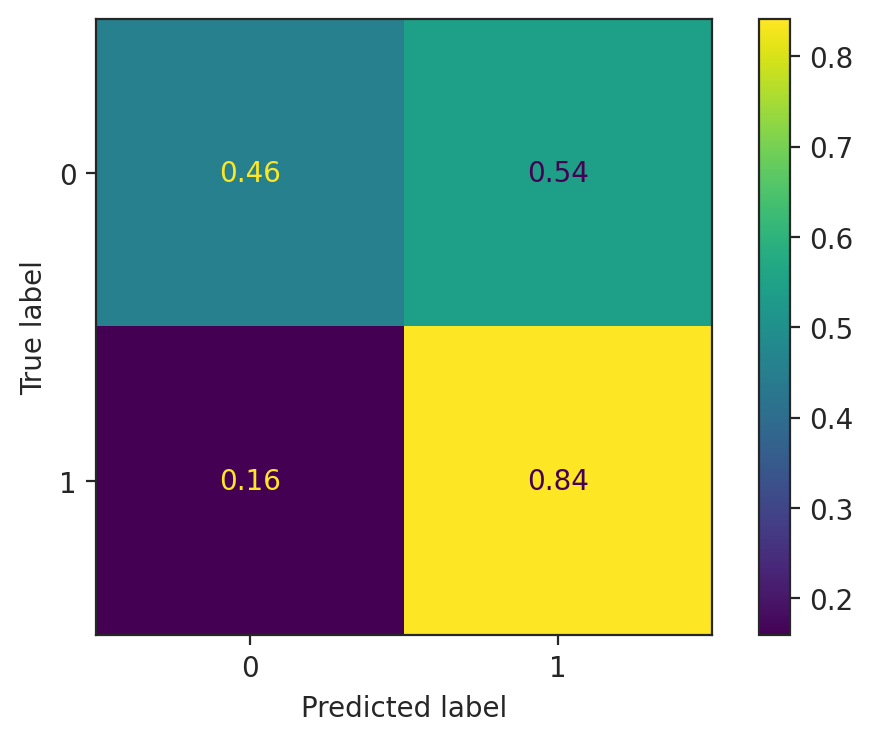

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_val,knn.predict(X_val_scale),normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
from sklearn.metrics import accuracy_score

y_val_pred = knn.predict(X_val_scale)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_accuracy

0.7204783258594918

### Sequential feature selection

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector

# Create a StratifiedKFold cross-validation object
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize your Logistic Regression model
knn = KNeighborsClassifier()

# Initialize the Sequential Feature Selector
sfs = SequentialFeatureSelector(knn,
                                k_features='best',  # Select the best subset of features
                                forward=True,        # Forward selection (you can also try backward=False)
                                scoring='accuracy',  # Use accuracy as the evaluation metric
                                cv=kfold)

# Fit the SFS to your training data
sfs.fit(X_train_scale, y_train)

# Get the selected feature indices
selected_features_indices = np.array(sfs.k_feature_idx_)

# Get the names of the selected features
selected_feature_names = X_train_scale.columns[selected_features_indices]

# Select the features from your training data
X_train_selected = X_train_scale[selected_feature_names]

# Train your Logistic Regression model on the selected features
knn.fit(X_train_selected, y_train)

# Print the selected feature names
print("Selected feature names:", selected_feature_names)


Selected feature names: Index(['AS', 'HST', 'AST', 'HR', 'MaxH', 'Max>2.5'], dtype='object')


In [ ]:
# evaluate the model on your validation or test set
X_val_selected = X_val_scale[selected_feature_names]
y_val_pred = knn.predict(X_val_selected)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_accuracy

0.7234678624813154

### gridsearchCV

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import  make_scorer,f1_score,precision_score,recall_score


param_grid = {
    'n_neighbors': [2,5,8,10],
    'weights': ['uniform','distance'],

}


knn = KNeighborsClassifier()

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store cross-validation results
cv_scores = []

# Iterate over the cross-validation folds
for train_idx, val_idx in kfold.split(X_train_selected, y_train):
    # Split the training data into training and validation sets for the fold
    X_train_fold, X_val_fold = X_train_selected.iloc[train_idx], X_train_selected.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]


smote = SMOTE(sampling_strategy='auto', random_state=42)

scorer = make_scorer(f1_score, average='weighted')

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, scoring=scorer, cv=kfold, return_train_score=True)

X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)

grid_search.fit(X_train_fold_resampled, y_train_fold_resampled)


best_estimator = grid_search.best_estimator_

In [ ]:
y_val_fold.value_counts()

NA    367
A     168
Name: ANA, dtype: int64

In [ ]:
y_train.value_counts()

NA    1833
A      842
Name: ANA, dtype: int64

In [ ]:
y_train_fold_resampled.value_counts()

A     1466
NA    1466
Name: ANA, dtype: int64

In [ ]:
grid_search.best_score_

0.7992314733875049

In [ ]:
grid_search.best_params_

{'n_neighbors': 2, 'weights': 'distance'}

In [ ]:
knn_results = pd.DataFrame(grid_search.cv_results_).sort_values('rank_test_score')

In [ ]:
knn_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_n_neighbors', 'param_weights', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

In [ ]:
knn_results[['param_n_neighbors', 'param_weights','mean_train_score','mean_test_score','rank_test_score']]

,param_n_neighbors,param_weights,mean_train_score,mean_test_score,rank_test_score
1,2,distance,1.000000,0.799231,1
5,8,distance,1.000000,0.798392,2
7,10,distance,1.000000,0.796275,3
3,5,distance,1.000000,0.789781,4
2,5,uniform,0.843964,0.763189,5
4,8,uniform,0.809512,0.756733,6
6,10,uniform,0.798354,0.756054,7
0,2,uniform,0.862243,0.754467,8


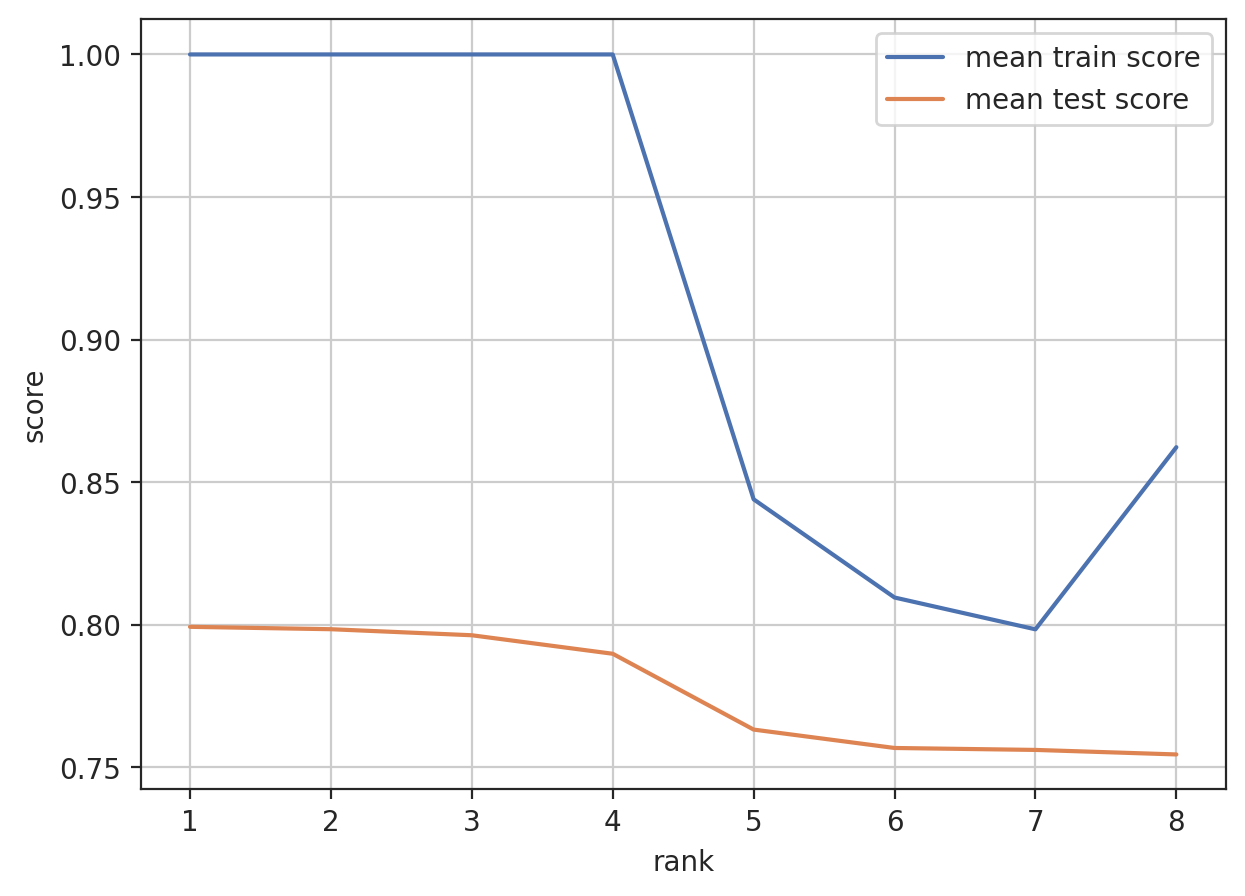

In [ ]:
fig,ax = plt.subplots(figsize=(7,5))
sns.lineplot(data=knn_results,x='rank_test_score',y='mean_train_score',ax=ax,errorbar=None)
sns.lineplot(data=knn_results,x='rank_test_score',y='mean_test_score',ax=ax,errorbar=None)
ax.legend(['mean train score','mean test score'])
ax.set_xlabel('rank')
ax.set_ylabel('score')
plt.grid(visible=True)

In [ ]:
winning_knn = grid_search.best_estimator_

In [ ]:
winning_knn

KNeighborsClassifier(n_neighbors=2, weights='distance')

In [ ]:
from sklearn.metrics import classification_report

y_pred_lg = winning_knn.predict(X_val_selected)
class_report_lg = classification_report(y_val, y_pred_lg)
print("\nClassification Report:")
print(class_report_lg)


Classification Report:
              precision    recall  f1-score   support

           A       0.51      0.57      0.54       210
          NA       0.79      0.75      0.77       459

    accuracy                           0.69       669
   macro avg       0.65      0.66      0.65       669
weighted avg       0.70      0.69      0.70       669



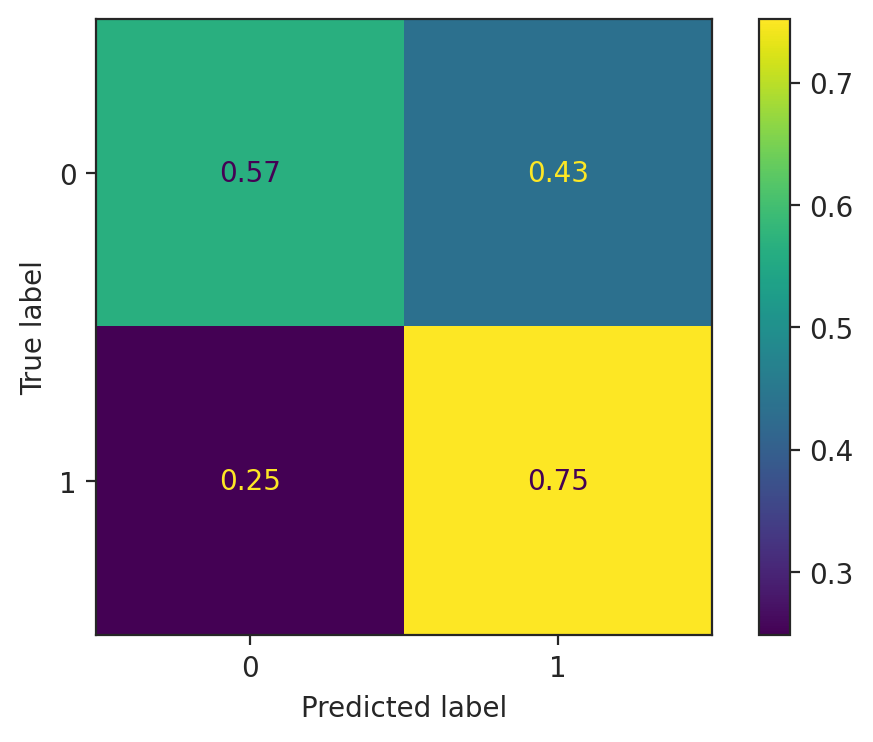

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_val,winning_knn.predict(X_val_selected),normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 10 , weights = 'uniform')

In [ ]:
knn.fit(X_train_selected,y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
from sklearn.metrics import classification_report

y_pred_lg = knn.predict(X_val_selected)
class_report_knn = classification_report(y_val, y_pred_lg)
print("\nClassification Report:")
print(class_report_knn)


Classification Report:
              precision    recall  f1-score   support

           A       0.60      0.56      0.58       210
          NA       0.80      0.83      0.82       459

    accuracy                           0.74       669
   macro avg       0.70      0.69      0.70       669
weighted avg       0.74      0.74      0.74       669



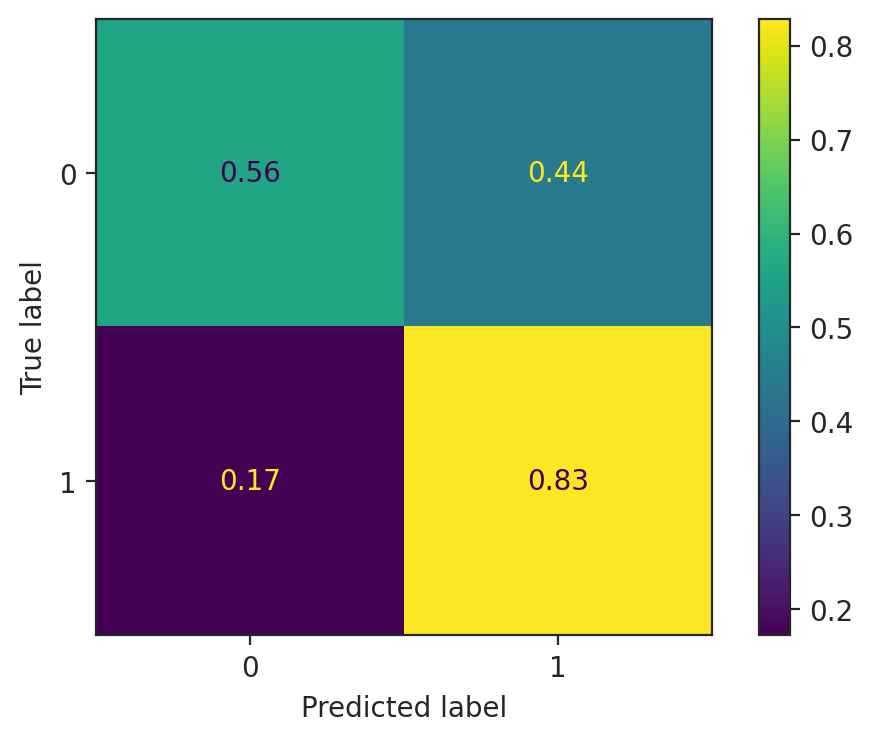

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_val,knn.predict(X_val_selected),normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

## **SVM**

In [ ]:
from sklearn.svm import SVC
svc =SVC()

### scaling the data

In [ ]:
norm_cols=['MW', 'Year','Overall_diff', 'Attack_diff',\
       'Midfield_diff', 'Defence_diff']

In [ ]:
std_cols = [col for col in X_train.columns if col not in norm_cols]

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,Normalizer

In [ ]:
# Create transformers
stdscaling_transformer = StandardScaler()
normscaling_transformer = Normalizer()

# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("std", stdscaling_transformer, std_cols),
        ("norm", normscaling_transformer, norm_cols)
    ],
    remainder='passthrough'
)

# Apply the transformations and convert back to a pandas DataFrame
X_train_scale = preprocessor.fit_transform(X_train)
X_train_scale = pd.DataFrame(X_train_scale, columns=std_cols + norm_cols)

In [ ]:
X_train_scale.head(5)

,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,...,Elo_Before_Away,Days_D,form_diff,SP_diff,MW,Year,Overall_diff,Attack_diff,Midfield_diff,Defence_diff
0,0.719291,-0.068497,-0.344458,-0.846806,-0.749180,0.007827,0.387640,-0.638109,-1.254484,0.183019,...,-0.807417,-0.004156,1.000239,0.424784,0.013887,0.999891,0.002480,0.002976,0.002480,0.001984
1,1.778528,-0.477947,0.353327,0.371920,-1.338002,0.290761,-0.583881,-0.267115,-0.441167,0.960121,...,-0.979516,-0.004156,0.247957,1.418284,0.006429,0.999972,0.001484,0.001978,0.002473,0.001484
2,0.719291,-1.501574,-0.693351,-1.659291,-0.454769,-0.275107,-0.907721,-0.638109,-0.441167,1.737224,...,-1.451476,2.237324,-0.286267,0.027385,0.015855,0.999872,0.000991,0.000495,0.000991,0.001486
3,-0.869564,1.978756,0.353327,1.184405,-0.454769,-1.406842,-0.260041,2.700834,-1.254484,-1.371187,...,-0.626763,-0.004156,2.359889,1.219584,0.015390,0.999880,0.000496,-0.000496,0.000993,0.000993
4,1.072370,-0.887398,1.051113,-0.440564,-1.043591,0.573695,-0.907721,-1.380096,-1.254484,-0.594084,...,1.793697,-0.004156,-0.195649,-0.370015,0.009405,0.999928,-0.003960,-0.004455,-0.003465,-0.002970


In [ ]:
X_val_scale = preprocessor.fit_transform(X_val)
X_val_scale = pd.DataFrame(X_val_scale, columns=std_cols + norm_cols)

X_val_scale.head(5)

,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,...,Elo_Before_Away,Days_D,form_diff,SP_diff,MW,Year,Overall_diff,Attack_diff,Midfield_diff,Defence_diff
0,-1.958078,0.522275,-1.079245,1.107549,-0.454942,0.063528,-1.612581,-0.989545,-0.418118,0.238479,...,1.069591,0.054890,0.365082,1.684272,0.009896,0.999946,-0.001484,-0.000495,-0.000990,-0.002474
1,0.536394,-0.697988,1.005495,-0.468941,0.783536,-1.843519,0.946889,1.542716,1.303241,-0.543591,...,-1.251670,-0.044089,0.518769,0.467869,0.008403,0.999947,0.002471,0.002966,0.003954,0.001977
2,1.249100,-1.104742,1.352952,-0.074818,-1.693419,-0.208908,3.826293,-1.713048,-1.278797,-0.543591,...,-0.840097,-0.044089,0.994748,0.467869,0.011892,0.999892,0.003964,0.004955,0.004955,0.002973
3,0.892747,0.522275,1.352952,0.713426,-0.764561,0.335963,0.626955,1.180965,0.442562,1.020548,...,-1.771235,0.054890,0.917668,0.467869,0.016888,0.999854,0.000993,0.000000,0.001987,0.000993
4,-0.889019,-1.104742,-0.036875,-0.468941,1.402775,1.153269,-0.332846,0.095710,-0.418118,3.366757,...,0.523247,0.054890,0.258993,0.670603,0.005451,0.999983,0.000000,-0.000991,0.001487,0.000496


### Fitting simple model

In [ ]:
svc.fit(X_train_scale,y_train)

SVC()

In [ ]:
from sklearn.metrics import classification_report

y_pred_svc = svc.predict(X_val_scale)
class_report_svc = classification_report(y_val, y_pred_svc)
print("\nClassification Report:")
print(class_report_svc)


Classification Report:
              precision    recall  f1-score   support

           A       0.68      0.50      0.57       210
          NA       0.79      0.90      0.84       459

    accuracy                           0.77       669
   macro avg       0.74      0.70      0.71       669
weighted avg       0.76      0.77      0.76       669



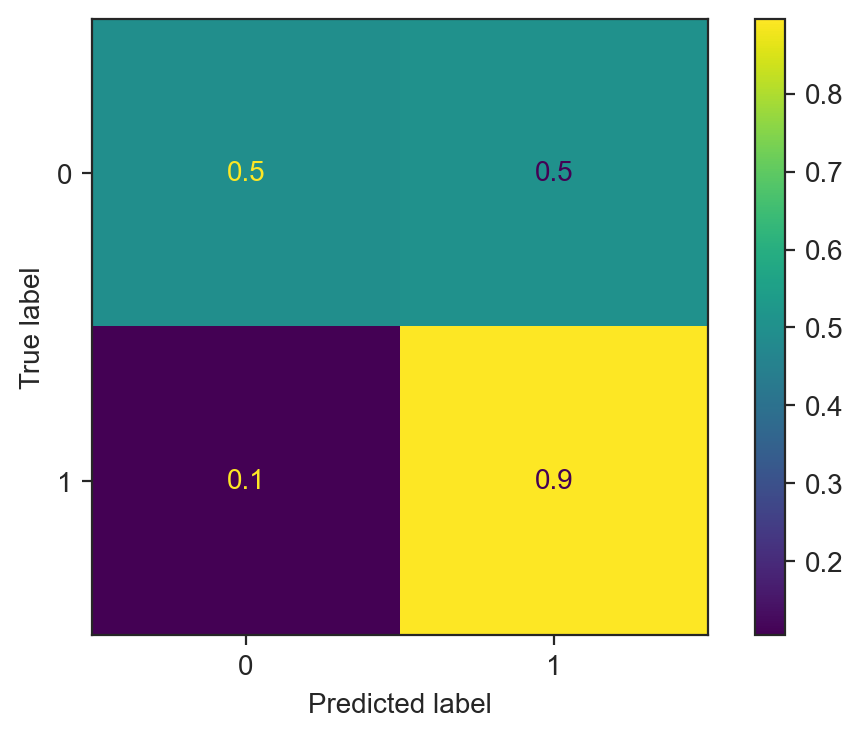

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_val,svc.predict(X_val_scale),normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
from sklearn.metrics import accuracy_score

y_val_pred = svc.predict(X_val_scale)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_accuracy

0.7698056801195815

### Sequential feature selection

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector

# Create a StratifiedKFold cross-validation object
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize your Logistic Regression model
svc =SVC()

# Initialize the Sequential Feature Selector
sfs = SequentialFeatureSelector(svc,
                                k_features='best',  # Select the best subset of features
                                forward=True,        # Forward selection (you can also try backward=False)
                                scoring='accuracy',  # Use accuracy as the evaluation metric
                                cv=kfold)

# Fit the SFS to your training data
sfs.fit(X_train_scale, y_train)

# Get the selected feature indices
selected_features_indices = np.array(sfs.k_feature_idx_)

# Get the names of the selected features
selected_feature_names = X_train_scale.columns[selected_features_indices]

# Select the features from your training data
X_train_selected = X_train_scale[selected_feature_names]

# Train your Logistic Regression model on the selected features
svc.fit(X_train_selected, y_train)

# Print the selected feature names
print("Selected feature names:", selected_feature_names)





Selected feature names: Index(['HS', 'AS', 'HST', 'AST', 'AF', 'HC', 'AC', 'HR', 'AvgH', 'AvgD',
       'AvgA', 'MaxH', 'MaxD', 'MaxA', 'Max>2.5', 'Max<2.5', 'Avg>2.5',
       'Avg<2.5', 'Elo_Before_Home', 'Days_D', 'form_diff', 'MW', 'Year',
       'Overall_diff', 'Attack_diff', 'Midfield_diff', 'Defence_diff'],
      dtype='object')


In [ ]:
# evaluate the model on your validation or test set
X_val_selected = X_val_scale[selected_feature_names]
y_val_pred = svc.predict(X_val_selected)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_accuracy

0.7787742899850523

### gridsearchCV

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import  make_scorer,f1_score,precision_score,recall_score


param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],          # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],    # Kernel type: linear, radial basis function (RBF), polynomial
    'degree': [2, 3, 4],                   # Degree for polynomial kernel (if used)
    'gamma': ['scale', 'auto'] + [0.001, 0.01, 0.1, 1],  # Kernel coefficient (gamma), 'scale', 'auto', or specific values
    'class_weight': ['balanced', None],     # Class weight: balanced or None
}


svc = SVC()

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store cross-validation results
cv_scores = []

# Iterate over the cross-validation folds
for train_idx, val_idx in kfold.split(X_train_selected, y_train):
    # Split the training data into training and validation sets for the fold
    X_train_fold, X_val_fold = X_train_selected.iloc[train_idx], X_train_selected.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]


smote = SMOTE(sampling_strategy='auto', random_state=42)

scorer = make_scorer(f1_score, average='weighted')

grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, scoring=scorer, cv=kfold,return_train_score=True)

X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)

grid_search.fit(X_train_fold_resampled, y_train_fold_resampled)


best_estimator = grid_search.best_estimator_

In [ ]:
y_val_fold.value_counts()

NA    367
A     168
Name: ANA, dtype: int64

In [ ]:
y_train.value_counts()

NA    1833
A      842
Name: ANA, dtype: int64

In [ ]:
y_train_fold_resampled.value_counts()

A     1466
NA    1466
Name: ANA, dtype: int64

In [ ]:
grid_search.best_score_

0.8552276604085597

In [ ]:
grid_search.best_params_

{'C': 10, 'class_weight': 'balanced', 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}

In [ ]:
svc_results = pd.DataFrame(grid_search.cv_results_).sort_values('rank_test_score')

In [ ]:
svc_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'param_class_weight', 'param_degree', 'param_gamma',
       'param_kernel', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

In [ ]:
svc_results[['param_C', 'param_class_weight', 'param_degree', 'param_gamma','param_kernel','mean_train_score','mean_test_score','rank_test_score']]

,param_C,param_class_weight,param_degree,param_gamma,param_kernel,mean_train_score,mean_test_score,rank_test_score
520,10,None,3,1,rbf,1.000000,0.855228,1
502,10,None,2,1,rbf,1.000000,0.855228,1
538,10,None,4,1,rbf,1.000000,0.855228,1
484,10,balanced,4,1,rbf,1.000000,0.855228,1
448,10,balanced,2,1,rbf,1.000000,0.855228,1
...,...,...,...,...,...,...,...,...
101,0.001,None,4,0.01,poly,0.338494,0.338157,533
260,0.1,balanced,4,0.001,poly,0.338304,0.338157,533
44,0.001,balanced,4,0.001,poly,0.338304,0.338157,533
530,10,None,4,0.001,poly,0.338494,0.338157,533


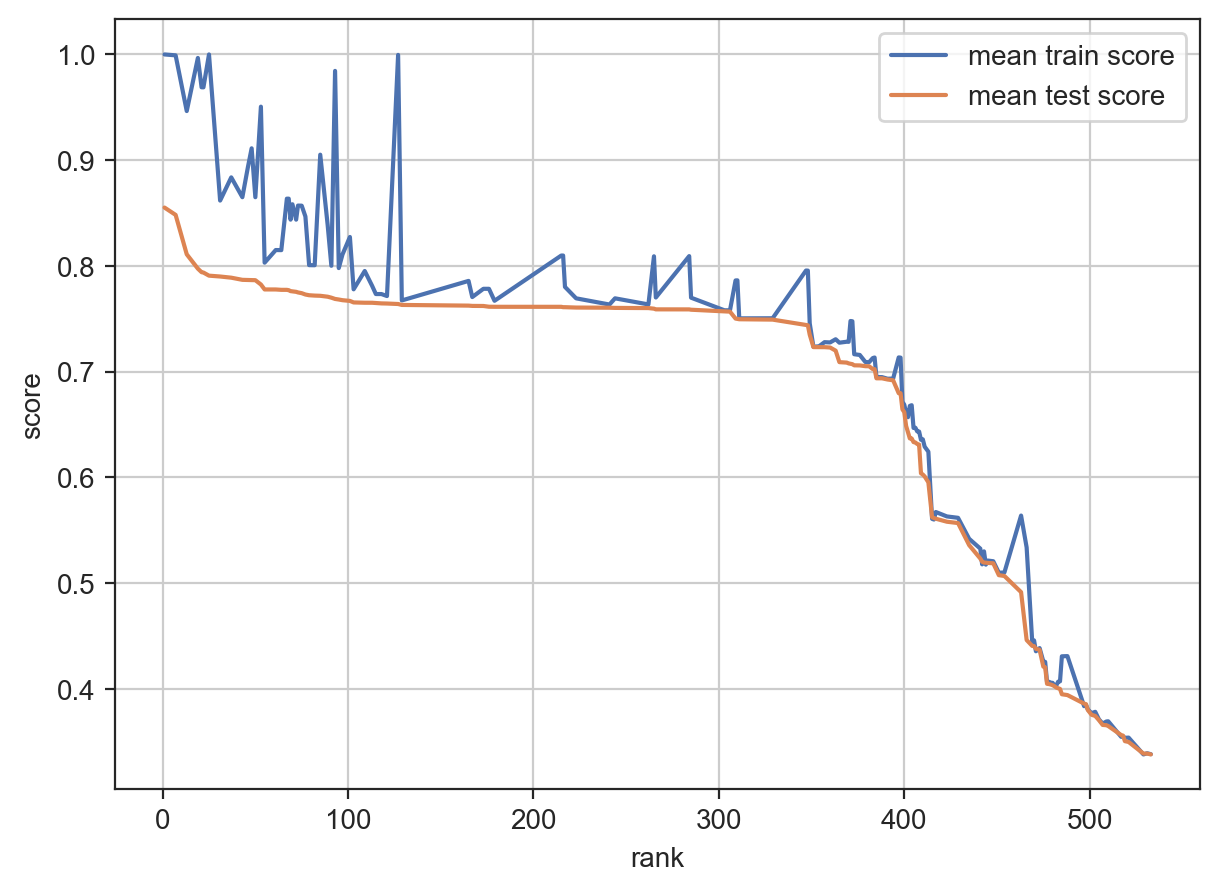

In [ ]:
fig,ax = plt.subplots(figsize=(7,5))
sns.lineplot(data=svc_results,x='rank_test_score',y='mean_train_score',ax=ax,ci=None)
sns.lineplot(data=svc_results,x='rank_test_score',y='mean_test_score',ax=ax,ci=None)
ax.legend(['mean train score','mean test score'])
ax.set_xlabel('rank')
ax.set_ylabel('score')
plt.grid(visible=True)

In [ ]:
winning_svc = grid_search.best_estimator_

In [ ]:
winning_svc

SVC(C=10, class_weight='balanced', degree=2, gamma=1)

In [ ]:
from sklearn.metrics import classification_report

y_pred_svc = winning_svc.predict(X_val_selected)
class_report_svc = classification_report(y_val, y_pred_svc)
print("\nClassification Report:")
print(class_report_svc)


Classification Report:
              precision    recall  f1-score   support

           A       0.53      0.10      0.17       210
          NA       0.70      0.96      0.81       459

    accuracy                           0.69       669
   macro avg       0.61      0.53      0.49       669
weighted avg       0.64      0.69      0.61       669



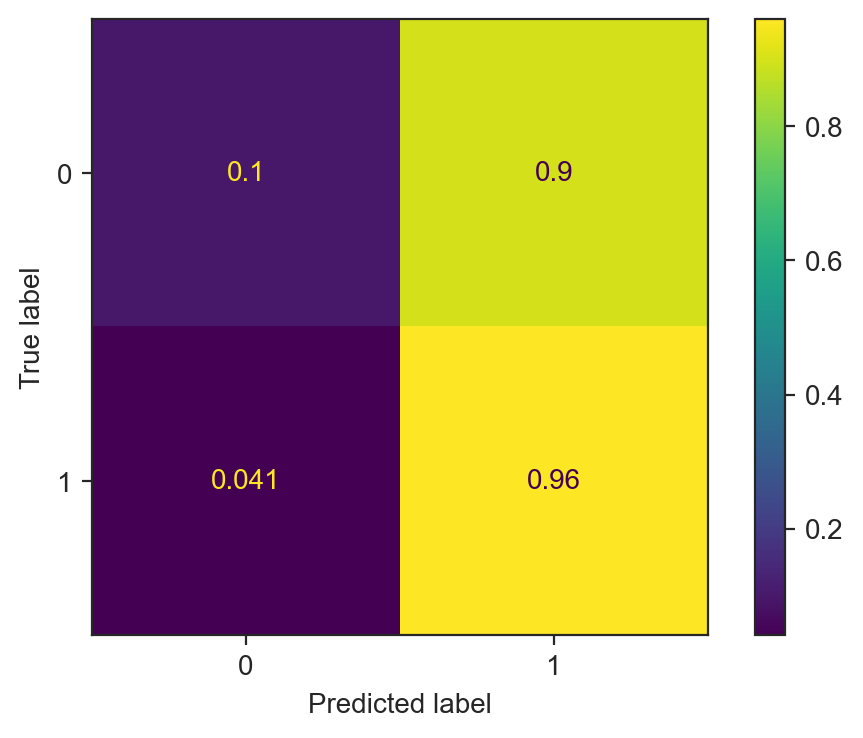

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_val,winning_svc.predict(X_val_selected),normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
# evaluate the model on your validation or test set
X_val_selected = X_val_scale[selected_feature_names]
y_val_pred = winning_svc.predict(X_val_selected)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_accuracy

0.6890881913303438

In [ ]:
svc_results['diff']=abs(svc_results['mean_train_score']-svc_results['mean_test_score'])

sorted_table = svc_results[['param_C', 'param_class_weight', 'param_degree', 'param_gamma','param_kernel',\
                            'mean_train_score','mean_test_score','diff','rank_test_score']]\
                            .sort_values(by=['diff', 'mean_test_score'], ascending=[True, False])
sorted_table

,param_C,param_class_weight,param_degree,param_gamma,param_kernel,mean_train_score,mean_test_score,diff,rank_test_score
77,0.001,None,3,auto,poly,0.380109,0.380115,0.000006,499
206,0.01,None,4,0.001,poly,0.338304,0.338157,0.000148,533
98,0.001,None,4,0.001,poly,0.338304,0.338157,0.000148,533
422,1,None,4,0.001,poly,0.338304,0.338157,0.000148,533
260,0.1,balanced,4,0.001,poly,0.338304,0.338157,0.000148,533
...,...,...,...,...,...,...,...,...,...
539,10,None,4,1,poly,1.000000,0.790831,0.209169,25
413,1,None,3,1,poly,0.984396,0.768812,0.215584,93
359,1,balanced,3,1,poly,0.984481,0.768812,0.215669,93
521,10,None,3,1,poly,0.999574,0.764024,0.235550,127


In [ ]:
sorted_table = sorted_table.loc[sorted_table['mean_test_score'] > 0.50].\
sort_values(by=['diff', 'mean_test_score'], ascending=[True, False])

sorted_table

,param_C,param_class_weight,param_degree,param_gamma,param_kernel,mean_train_score,mean_test_score,diff,rank_test_score
202,0.01,None,4,auto,rbf,0.723617,0.723271,0.000345,351
166,0.01,None,2,auto,rbf,0.723617,0.723271,0.000345,351
184,0.01,None,3,auto,rbf,0.723617,0.723271,0.000345,351
208,0.01,None,4,0.01,rbf,0.693372,0.692637,0.000735,391
172,0.01,None,2,0.01,rbf,0.693372,0.692637,0.000735,391
...,...,...,...,...,...,...,...,...,...
539,10,None,4,1,poly,1.000000,0.790831,0.209169,25
413,1,None,3,1,poly,0.984396,0.768812,0.215584,93
359,1,balanced,3,1,poly,0.984481,0.768812,0.215669,93
521,10,None,3,1,poly,0.999574,0.764024,0.235550,127


In [ ]:
param_svc = sorted_table.iloc[0]

param_svc

param_C                   0.01
param_class_weight        None
param_degree                 4
param_gamma               auto
param_kernel               rbf
mean_train_score      0.723617
mean_test_score       0.723271
diff                  0.000345
rank_test_score            351
Name: 202, dtype: object

In [ ]:
X_train_selected = X_train_scale[['HS', 'AS', 'HST', 'AST', 'AF', 'HC', 'AC', 'HR', 'AvgH', 'AvgD',\
       'AvgA', 'MaxH', 'MaxD', 'MaxA', 'Max>2.5', 'Max<2.5', 'Avg>2.5',\
       'Avg<2.5', 'Elo_Before_Home', 'Days_D', 'form_diff', 'MW', 'Year',\
       'Overall_diff', 'Attack_diff', 'Midfield_diff', 'Defence_diff']]

X_val_selected = X_val_scale[['HS', 'AS', 'HST', 'AST', 'AF', 'HC', 'AC', 'HR', 'AvgH', 'AvgD',\
       'AvgA', 'MaxH', 'MaxD', 'MaxA', 'Max>2.5', 'Max<2.5', 'Avg>2.5',\
       'Avg<2.5', 'Elo_Before_Home', 'Days_D', 'form_diff', 'MW', 'Year',\
       'Overall_diff', 'Attack_diff', 'Midfield_diff', 'Defence_diff']]

In [ ]:
from sklearn.svm import SVC



# Define hyperparameters for the first model (adjust these values based on your first model)
first_model_hyperparameters = {
    'C': 0.01,
    'class_weight': None,
    'degree': 4,
    'gamma': 'auto',
    'kernel': 'rbf',
    }

# Create a new instance of the HistGradientBoostingClassifier with the first model's hyperparameters
first_svc = SVC(**first_model_hyperparameters)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Iterate over the cross-validation folds
for train_idx, val_idx in kfold.split(X_train_selected, y_train):
    # Split the training data into training and validation sets for the fold
    X_train_fold, X_val_fold = X_train_selected.iloc[train_idx], X_train_selected.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]


smote = SMOTE(sampling_strategy='auto', random_state=42)

X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)

first_svc.fit(X_train_fold_resampled, y_train_fold_resampled)

y_val_pred = first_svc.predict(X_val_selected)

# Calculate the validation accuracy
val_accuracy = accuracy_score(y_val, y_val_pred)

# Print the validation accuracy
print("Validation Accuracy:", val_accuracy)


Validation Accuracy: 0.7130044843049327


In [ ]:
from sklearn.metrics import classification_report

y_pred_svc = first_svc.predict(X_val_selected)
class_report_svc = classification_report(y_val, y_pred_svc)
print("\nClassification Report:")
print(class_report_svc)


Classification Report:
              precision    recall  f1-score   support

           A       0.53      0.77      0.63       210
          NA       0.87      0.69      0.77       459

    accuracy                           0.71       669
   macro avg       0.70      0.73      0.70       669
weighted avg       0.76      0.71      0.72       669



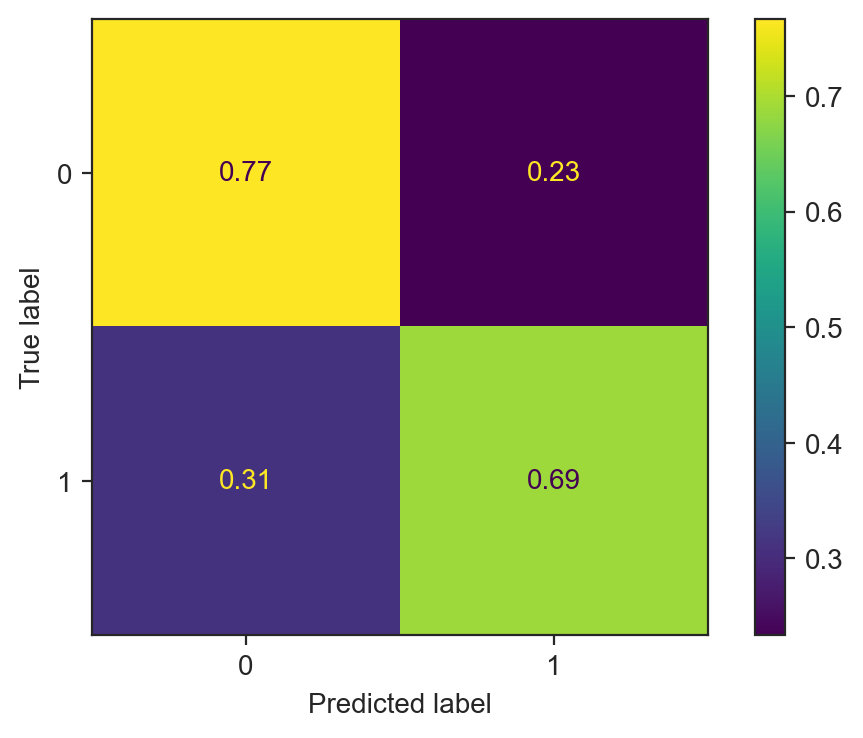

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_val,first_svc.predict(X_val_selected),normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

## **GNB**

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

### Fitting simple model

In [ ]:
nb.fit(X_train,y_train)

GaussianNB()

In [ ]:
from sklearn.metrics import classification_report

y_pred_nb = nb.predict(X_val)
class_report_nb = classification_report(y_val, y_pred_nb)
print("\nClassification Report:")
print(class_report_nb)


Classification Report:
              precision    recall  f1-score   support

           A       0.51      0.71      0.59       210
          NA       0.84      0.68      0.75       459

    accuracy                           0.69       669
   macro avg       0.67      0.70      0.67       669
weighted avg       0.74      0.69      0.70       669



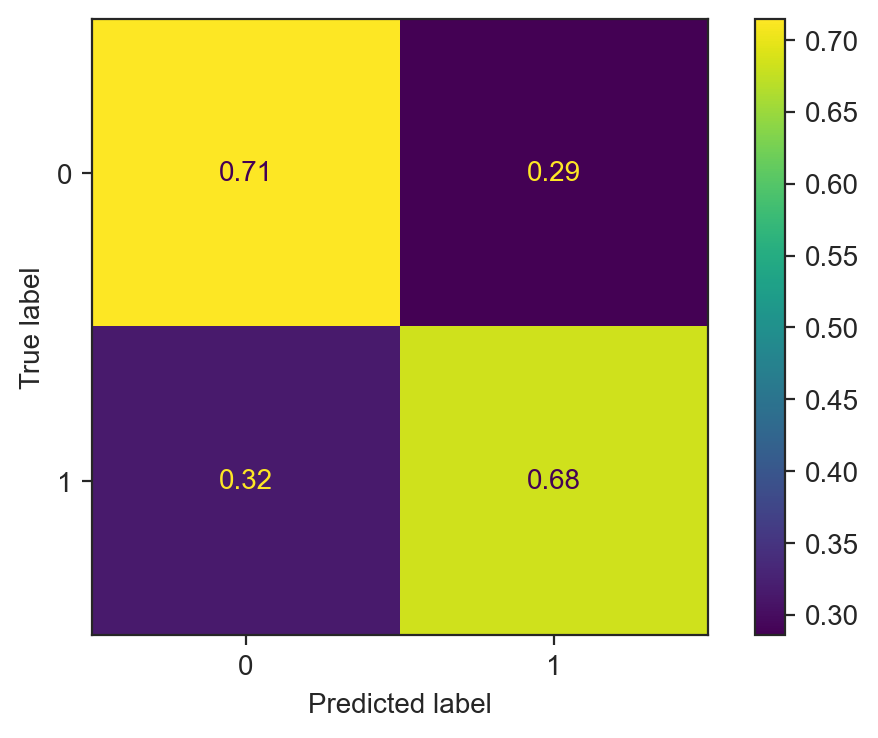

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_val,nb.predict(X_val),normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
from sklearn.metrics import accuracy_score

y_val_pred = nb.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_accuracy

0.6935724962630793

### Sequential feature selection

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector

# Create a StratifiedKFold cross-validation object
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize your Logistic Regression model
nb = GaussianNB()

# Initialize the Sequential Feature Selector
sfs = SequentialFeatureSelector(nb,
                                k_features='best',  # Select the best subset of features
                                forward=True,        # Forward selection (you can also try backward=False)
                                scoring='accuracy',  # Use accuracy as the evaluation metric
                                cv=kfold)

# Fit the SFS to your training data
sfs.fit(X_train, y_train)

# Get the selected feature indices
selected_features_indices = np.array(sfs.k_feature_idx_)

# Get the names of the selected features
selected_feature_names = X_train.columns[selected_features_indices]

# Select the features from your training data
X_train_selected = X_train[selected_feature_names]

# Train your Logistic Regression model on the selected features
nb.fit(X_train_selected, y_train)

# Print the selected feature names
print("Selected feature names:", selected_feature_names)





Selected feature names: Index(['HST', 'AST', 'HF', 'AF', 'AY', 'AvgH', 'AvgA', 'MW', 'Avg>2.5'], dtype='object')


In [ ]:
# evaluate the model on your validation or test set
X_val_selected = X_val[selected_feature_names]
y_val_pred = nb.predict(X_val_selected)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_accuracy

0.7772795216741405

### gridsearchCV

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from sklearn.metrics import  make_scorer,f1_score,precision_score,recall_score


param_grid = {
   'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5],  # Smoothing parameter for avoiding zero probabilities

}



nb = GaussianNB()

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store cross-validation results
cv_scores = []

# Iterate over the cross-validation folds
for train_idx, val_idx in kfold.split(X_train_selected, y_train):
    # Split the training data into training and validation sets for the fold
    X_train_fold, X_val_fold = X_train_selected.iloc[train_idx], X_train_selected.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]


smote = SMOTE(sampling_strategy='auto', random_state=42)

scorer = make_scorer(f1_score, average='weighted')

grid_search = GridSearchCV(estimator=nb, param_grid=param_grid, scoring=scorer, cv=kfold,return_train_score=True)

X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)

grid_search.fit(X_train_fold_resampled, y_train_fold_resampled)


best_estimator = grid_search.best_estimator_

In [ ]:
y_val_fold.value_counts()

NA    367
A     168
Name: ANA, dtype: int64

In [ ]:
y_train.value_counts()

NA    1833
A      842
Name: ANA, dtype: int64

In [ ]:
y_train_fold_resampled.value_counts()

A     1466
NA    1466
Name: ANA, dtype: int64

In [ ]:
grid_search.best_score_

0.7371073725493836

In [ ]:
grid_search.best_params_

{'var_smoothing': 1e-09}

In [ ]:
nb_results = pd.DataFrame(grid_search.cv_results_).sort_values('rank_test_score')

In [ ]:
nb_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_var_smoothing', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

In [ ]:
nb_results[['param_var_smoothing', 'mean_train_score','mean_test_score','rank_test_score']]

,param_var_smoothing,mean_train_score,mean_test_score,rank_test_score
0,0.0,0.737576,0.737107,1
1,0.0,0.737576,0.737107,1
2,0.0,0.737576,0.737107,1
3,0.000001,0.737576,0.737107,1
4,0.00001,0.738080,0.736417,5


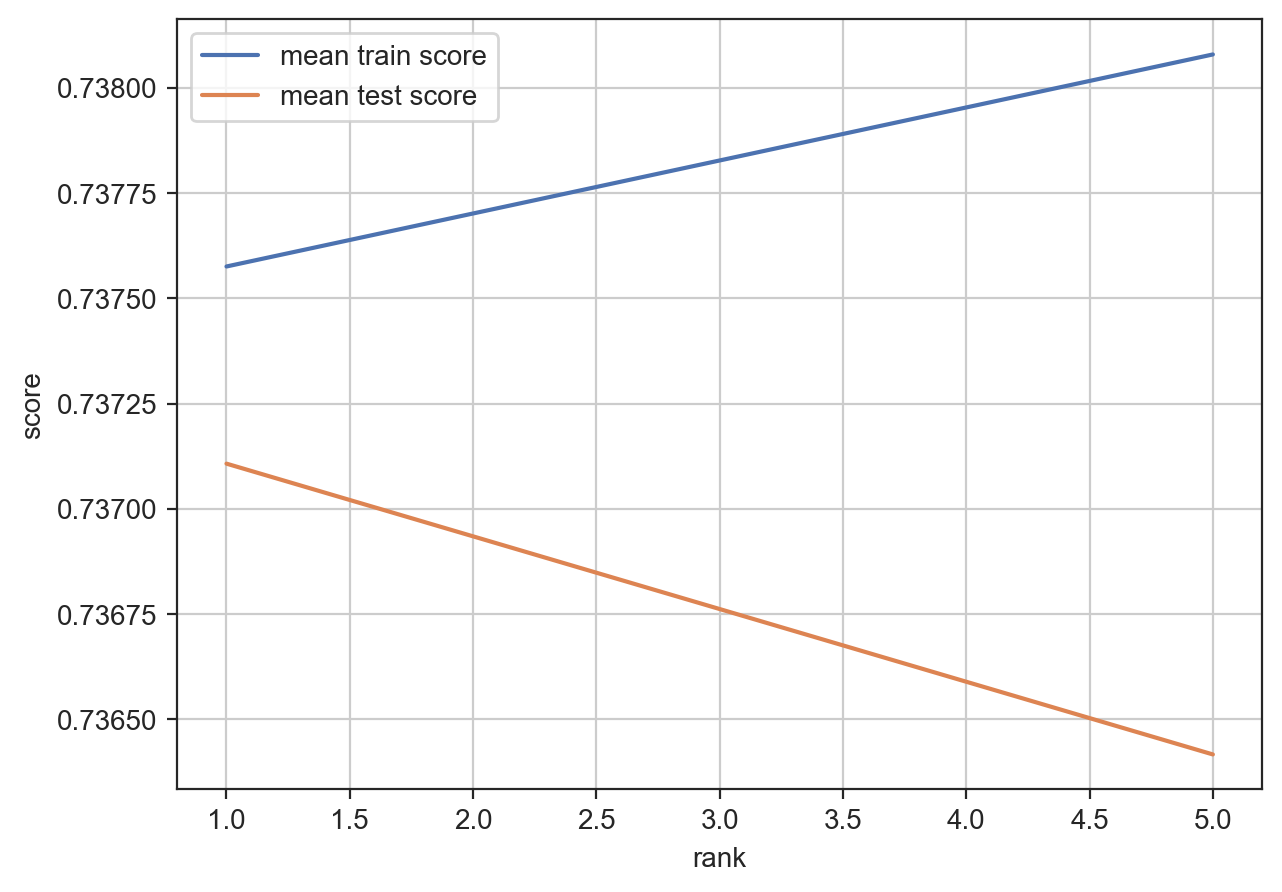

In [ ]:
fig,ax = plt.subplots(figsize=(7,5))
sns.lineplot(data=nb_results,x='rank_test_score',y='mean_train_score',ax=ax,ci=None)
sns.lineplot(data=nb_results,x='rank_test_score',y='mean_test_score',ax=ax,ci=None)
ax.legend(['mean train score','mean test score'])
ax.set_xlabel('rank')
ax.set_ylabel('score')
plt.grid(visible=True)

In [ ]:
winning_nb = grid_search.best_estimator_

In [ ]:
winning_nb

GaussianNB()

In [ ]:
from sklearn.metrics import classification_report

y_pred_nb = winning_nb.predict(X_val_selected)
class_report_nb = classification_report(y_val, y_pred_nb)
print("\nClassification Report:")
print(class_report_nb)


Classification Report:
              precision    recall  f1-score   support

           A       0.53      0.79      0.64       210
          NA       0.88      0.68      0.77       459

    accuracy                           0.72       669
   macro avg       0.71      0.74      0.70       669
weighted avg       0.77      0.72      0.73       669



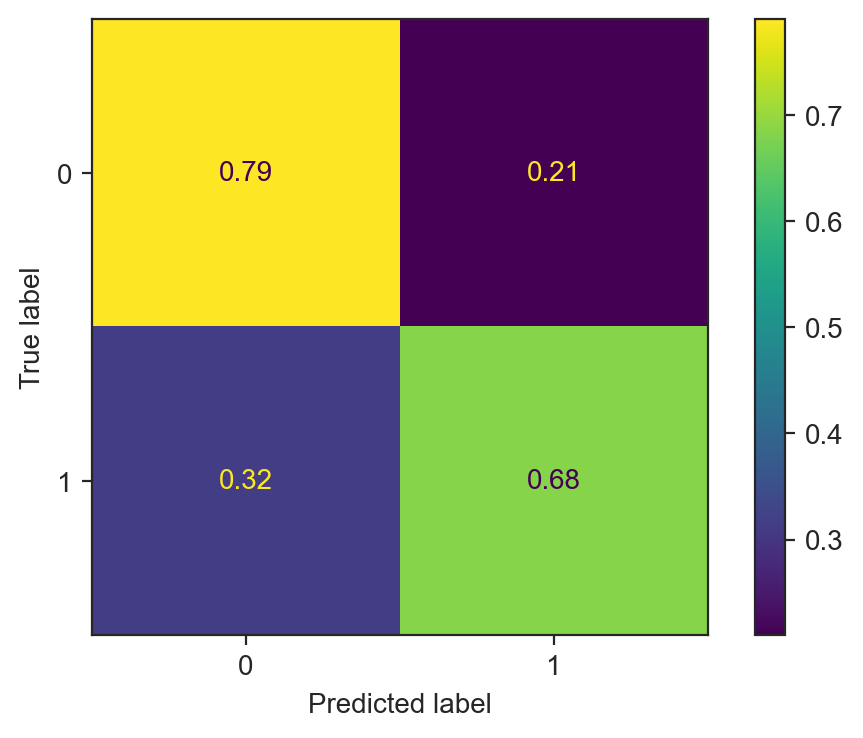

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_val,winning_nb.predict(X_val_selected),normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
# evaluate the model on your validation or test set
X_val_selected = X_val[selected_feature_names]
y_val_pred = winning_nb.predict(X_val_selected)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_accuracy

0.7174887892376681

## MLP

In [ ]:
from sklearn.neural_network import MLPClassifier


### scaling the data

In [ ]:
norm_cols=['MW', 'Year','Overall_diff', 'Attack_diff',\
       'Midfield_diff', 'Defence_diff']

In [ ]:
std_cols = [col for col in X_train.columns if col not in norm_cols]

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,Normalizer

In [ ]:
# Create transformers
stdscaling_transformer = StandardScaler()
normscaling_transformer = Normalizer()

# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("std", stdscaling_transformer, std_cols),
        ("norm", normscaling_transformer, norm_cols)
    ],
    remainder='passthrough'
)

# Apply the transformations and convert back to a pandas DataFrame
X_train_scale = preprocessor.fit_transform(X_train)
X_train_scale = pd.DataFrame(X_train_scale, columns=std_cols + norm_cols)

In [ ]:
X_train_scale.head(5)

,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,...,Elo_Before_Away,Days_D,form_diff,SP_diff,MW,Year,Overall_diff,Attack_diff,Midfield_diff,Defence_diff
0,0.719291,-0.068497,-0.344458,-0.846806,-0.749180,0.007827,0.387640,-0.638109,-1.254484,0.183019,...,-0.807417,-0.004156,1.000239,0.424784,0.013887,0.999891,0.002480,0.002976,0.002480,0.001984
1,1.778528,-0.477947,0.353327,0.371920,-1.338002,0.290761,-0.583881,-0.267115,-0.441167,0.960121,...,-0.979516,-0.004156,0.247957,1.418284,0.006429,0.999972,0.001484,0.001978,0.002473,0.001484
2,0.719291,-1.501574,-0.693351,-1.659291,-0.454769,-0.275107,-0.907721,-0.638109,-0.441167,1.737224,...,-1.451476,2.237324,-0.286267,0.027385,0.015855,0.999872,0.000991,0.000495,0.000991,0.001486
3,-0.869564,1.978756,0.353327,1.184405,-0.454769,-1.406842,-0.260041,2.700834,-1.254484,-1.371187,...,-0.626763,-0.004156,2.359889,1.219584,0.015390,0.999880,0.000496,-0.000496,0.000993,0.000993
4,1.072370,-0.887398,1.051113,-0.440564,-1.043591,0.573695,-0.907721,-1.380096,-1.254484,-0.594084,...,1.793697,-0.004156,-0.195649,-0.370015,0.009405,0.999928,-0.003960,-0.004455,-0.003465,-0.002970


In [ ]:
X_val_scale = preprocessor.fit_transform(X_val)
X_val_scale = pd.DataFrame(X_val_scale, columns=std_cols + norm_cols)

X_val_scale.head(5)

,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,...,Elo_Before_Away,Days_D,form_diff,SP_diff,MW,Year,Overall_diff,Attack_diff,Midfield_diff,Defence_diff
0,-1.958078,0.522275,-1.079245,1.107549,-0.454942,0.063528,-1.612581,-0.989545,-0.418118,0.238479,...,1.069591,0.054890,0.365082,1.684272,0.009896,0.999946,-0.001484,-0.000495,-0.000990,-0.002474
1,0.536394,-0.697988,1.005495,-0.468941,0.783536,-1.843519,0.946889,1.542716,1.303241,-0.543591,...,-1.251670,-0.044089,0.518769,0.467869,0.008403,0.999947,0.002471,0.002966,0.003954,0.001977
2,1.249100,-1.104742,1.352952,-0.074818,-1.693419,-0.208908,3.826293,-1.713048,-1.278797,-0.543591,...,-0.840097,-0.044089,0.994748,0.467869,0.011892,0.999892,0.003964,0.004955,0.004955,0.002973
3,0.892747,0.522275,1.352952,0.713426,-0.764561,0.335963,0.626955,1.180965,0.442562,1.020548,...,-1.771235,0.054890,0.917668,0.467869,0.016888,0.999854,0.000993,0.000000,0.001987,0.000993
4,-0.889019,-1.104742,-0.036875,-0.468941,1.402775,1.153269,-0.332846,0.095710,-0.418118,3.366757,...,0.523247,0.054890,0.258993,0.670603,0.005451,0.999983,0.000000,-0.000991,0.001487,0.000496


### Fitting simple model

In [ ]:
mlp = MLPClassifier(max_iter=1500)
mlp.fit(X_train_scale,y_train)

MLPClassifier(max_iter=1500)

In [ ]:
from sklearn.metrics import classification_report

y_pred_mlp = mlp.predict(X_val_scale)
class_report_mlp = classification_report(y_val, y_pred_mlp)
print("\nClassification Report:")
print(class_report_mlp)


Classification Report:
              precision    recall  f1-score   support

           A       0.62      0.60      0.61       210
          NA       0.82      0.83      0.82       459

    accuracy                           0.76       669
   macro avg       0.72      0.72      0.72       669
weighted avg       0.76      0.76      0.76       669



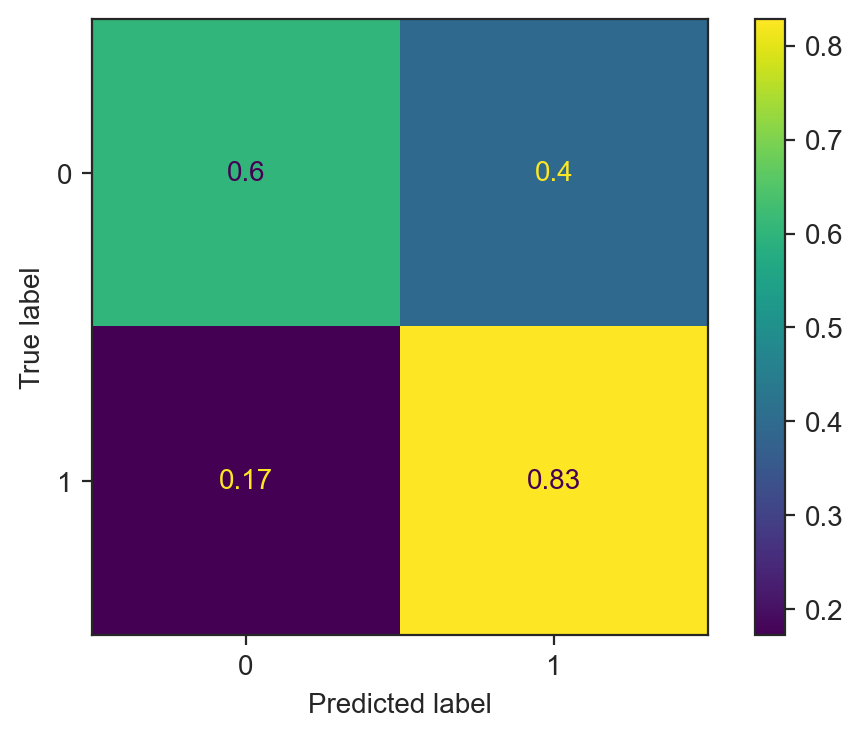

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_val,mlp.predict(X_val_scale),normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
from sklearn.metrics import accuracy_score

y_val_pred = mlp.predict(X_val_scale)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_accuracy

0.757847533632287

### gridsearchCV

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import  make_scorer,f1_score,precision_score,recall_score


param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],  # Number of neurons in each hidden layer
    'activation': ['relu', 'tanh', 'logistic','identity'],       # Activation functions for hidden layers
    'solver': ['adam', 'lbfgs'],                     # Optimization algorithm
    'alpha': [0.0001, 0.001, 0.01],                 # L2 regularization term
    'learning_rate': ['constant', 'invscaling', 'adaptive'],  # Learning rate schedule
    'max_iter': [2000, 3000],                     # Maximum number of iterations
    'early_stopping' : [True]
}



mlp = MLPClassifier()

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store cross-validation results
cv_scores = []

# Iterate over the cross-validation folds
for train_idx, val_idx in kfold.split(X_train_scale, y_train):
    # Split the training data into training and validation sets for the fold
    X_train_fold, X_val_fold = X_train_scale.iloc[train_idx], X_train_scale.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]


smote = SMOTE(sampling_strategy='auto', random_state=42)

scorer = make_scorer(f1_score, average='weighted')

grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring=scorer, cv=kfold,return_train_score=True)

X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)

grid_search.fit(X_train_fold_resampled, y_train_fold_resampled)


best_estimator = grid_search.best_estimator_

In [ ]:
y_val_fold.value_counts()

NA    367
A     168
Name: ANA, dtype: int64

In [ ]:
y_train.value_counts()

NA    1833
A      842
Name: ANA, dtype: int64

In [ ]:
y_train_fold_resampled.value_counts()

A     1466
NA    1466
Name: ANA, dtype: int64

In [ ]:
grid_search.best_score_

0.8361943848840921

In [ ]:
grid_search.best_params_

{'activation': 'logistic',
 'alpha': 0.01,
 'early_stopping': True,
 'hidden_layer_sizes': (150,),
 'learning_rate': 'invscaling',
 'max_iter': 2000,
 'solver': 'lbfgs'}

In [ ]:
mlp_results = pd.DataFrame(grid_search.cv_results_).sort_values('rank_test_score')

In [ ]:
mlp_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_activation', 'param_alpha', 'param_early_stopping',
       'param_hidden_layer_sizes', 'param_learning_rate', 'param_max_iter',
       'param_solver', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

In [ ]:
mlp_results[['param_hidden_layer_sizes', 'param_activation', 'param_solver', 'param_alpha', 'param_learning_rate', \
                 'param_max_iter','mean_train_score','mean_test_score','rank_test_score']]

,param_hidden_layer_sizes,param_activation,param_solver,param_alpha,param_learning_rate,param_max_iter,mean_train_score,mean_test_score,rank_test_score
317,"(150,)",logistic,lbfgs,0.01,invscaling,2000,1.000000,0.836194,1
323,"(150,)",logistic,lbfgs,0.01,adaptive,3000,1.000000,0.835891,2
99,"(150,)",relu,lbfgs,0.01,constant,3000,1.000000,0.833210,3
305,"(100,)",logistic,lbfgs,0.01,invscaling,2000,1.000000,0.832547,4
93,"(100,)",relu,lbfgs,0.01,adaptive,2000,1.000000,0.832201,5
...,...,...,...,...,...,...,...,...,...
268,"(100,)",logistic,adam,0.001,invscaling,2000,0.763716,0.745070,428
256,"(50,)",logistic,adam,0.001,invscaling,2000,0.758266,0.744822,429
264,"(100,)",logistic,adam,0.001,constant,2000,0.754971,0.738282,430
300,"(100,)",logistic,adam,0.01,constant,2000,0.748448,0.737953,431


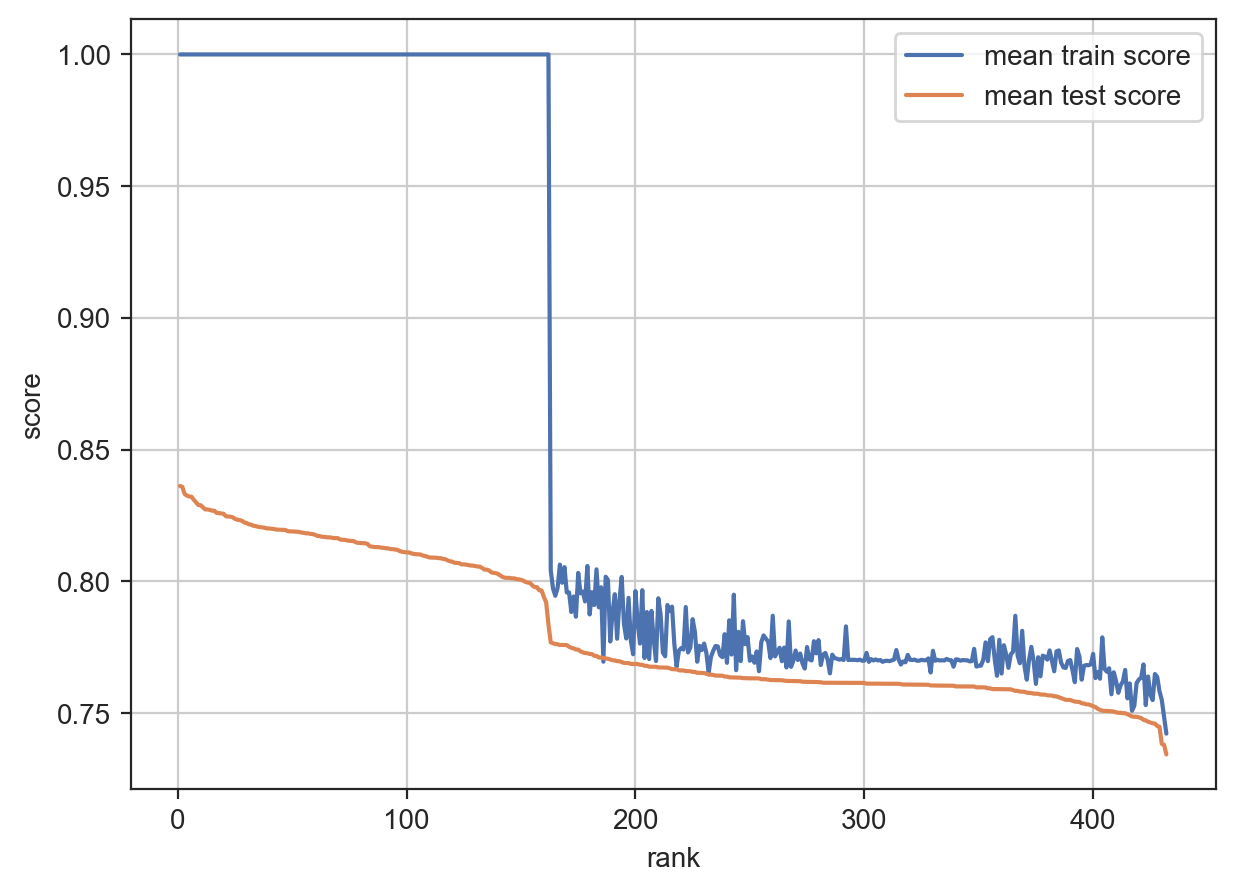

In [ ]:
fig,ax = plt.subplots(figsize=(7,5))
sns.lineplot(data=mlp_results,x='rank_test_score',y='mean_train_score',ax=ax,ci=None)
sns.lineplot(data=mlp_results,x='rank_test_score',y='mean_test_score',ax=ax,ci=None)
ax.legend(['mean train score','mean test score'])
ax.set_xlabel('rank')
ax.set_ylabel('score')
plt.grid(visible=True)

In [ ]:
winning_mlp = grid_search.best_estimator_

In [ ]:
winning_mlp

MLPClassifier(activation='logistic', alpha=0.01, early_stopping=True,
              hidden_layer_sizes=(150,), learning_rate='invscaling',
              max_iter=2000, solver='lbfgs')

In [ ]:
from sklearn.metrics import classification_report

y_pred_mlp = winning_mlp.predict(X_val_scale)
class_report_mlp = classification_report(y_val, y_pred_mlp)
print("\nClassification Report:")
print(class_report_mlp)


Classification Report:
              precision    recall  f1-score   support

           A       0.56      0.57      0.56       210
          NA       0.80      0.79      0.80       459

    accuracy                           0.72       669
   macro avg       0.68      0.68      0.68       669
weighted avg       0.72      0.72      0.72       669



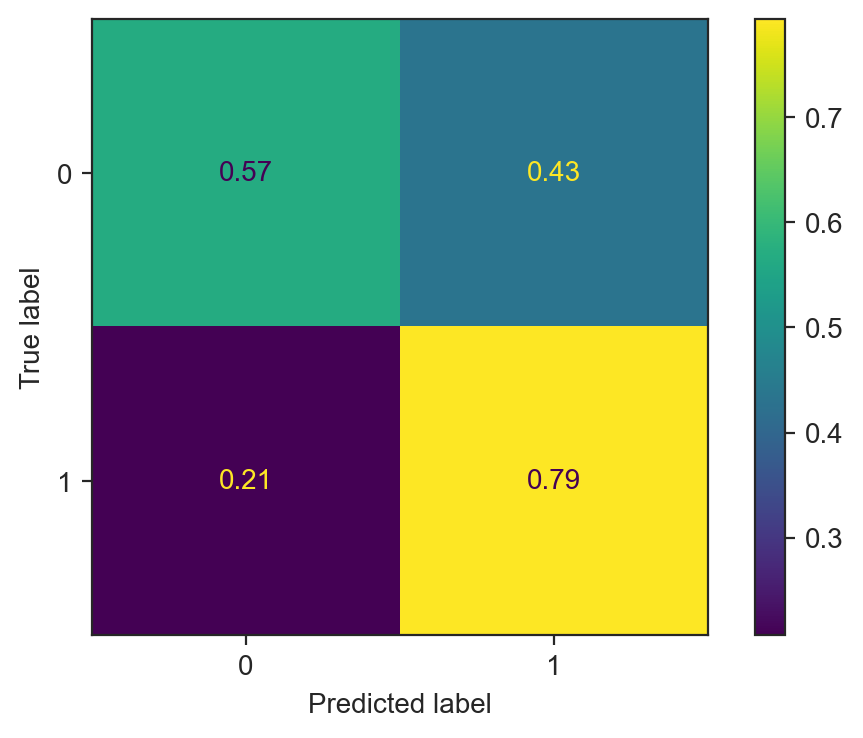

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_val,winning_mlp.predict(X_val_scale),normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
# evaluate the model on your validation or test set

y_val_pred = winning_mlp.predict(X_val_scale)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_accuracy

0.7219730941704036

In [ ]:
mlp_results['diff']=abs(mlp_results['mean_train_score']-mlp_results['mean_test_score'])

sorted_table = mlp_results[['param_hidden_layer_sizes', 'param_activation', 'param_solver', \
                            'param_alpha', 'param_learning_rate', \
                 'param_max_iter','mean_train_score','diff','mean_test_score','rank_test_score']]\
                            .sort_values(by=['diff', 'mean_test_score'], ascending=[True, False])
sorted_table

,param_hidden_layer_sizes,param_activation,param_solver,param_alpha,param_learning_rate,param_max_iter,mean_train_score,diff,mean_test_score,rank_test_score
218,"(50,)",logistic,adam,0.0001,constant,3000,0.765171,0.000577,0.764595,232
408,"(100,)",identity,adam,0.01,constant,2000,0.767628,0.001038,0.766590,218
326,"(50,)",identity,adam,0.0001,constant,3000,0.769488,0.001446,0.770935,186
244,"(150,)",logistic,adam,0.0001,invscaling,2000,0.750861,0.002161,0.748700,417
406,"(50,)",identity,adam,0.01,adaptive,3000,0.769744,0.002188,0.767557,209
...,...,...,...,...,...,...,...,...,...,...
253,"(50,)",logistic,lbfgs,0.001,constant,2000,1.000000,0.203416,0.796584,158
221,"(50,)",logistic,lbfgs,0.0001,invscaling,2000,1.000000,0.203470,0.796530,159
147,"(50,)",tanh,lbfgs,0.001,constant,3000,1.000000,0.205924,0.794076,160
223,"(50,)",logistic,lbfgs,0.0001,invscaling,3000,1.000000,0.208018,0.791982,161


In [ ]:
sorted_table.iloc[0]

param_hidden_layer_sizes       (50,)
param_activation            logistic
param_solver                    adam
param_alpha                   0.0001
param_learning_rate         constant
param_max_iter                  3000
mean_train_score            0.765171
diff                        0.000577
mean_test_score             0.764595
rank_test_score                  232
Name: 218, dtype: object

In [ ]:
from sklearn.neural_network import MLPClassifier



# Define hyperparameters for the first model (adjust these values based on your first model)
first_model_hyperparameters = {
    'activation': 'logistic',
    'solver': 'adam',
    'alpha': 0.0001,
    'learning_rate': 'constant',
    'max_iter': 3000,
    'hidden_layer_sizes' : (50,)
    }

# Create a new instance of the HistGradientBoostingClassifier with the first model's hyperparameters
first_mlp = MLPClassifier(**first_model_hyperparameters)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Iterate over the cross-validation folds
for train_idx, val_idx in kfold.split(X_train_scale, y_train):
    # Split the training data into training and validation sets for the fold
    X_train_fold, X_val_fold = X_train_scale.iloc[train_idx], X_train_scale.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]


smote = SMOTE(sampling_strategy='auto', random_state=42)

X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)

first_mlp.fit(X_train_fold_resampled, y_train_fold_resampled)

y_val_pred = first_mlp.predict(X_val_scale)

# Calculate the validation accuracy
val_accuracy = accuracy_score(y_val, y_val_pred)

# Print the validation accuracy
print("Validation Accuracy:", val_accuracy)


Validation Accuracy: 0.7174887892376681


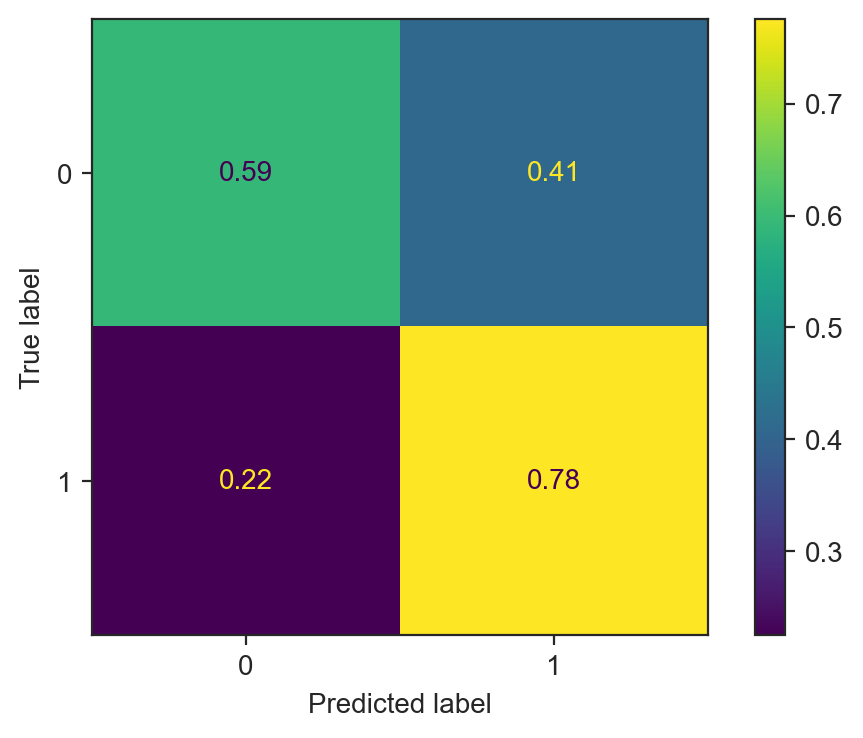

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_val,first_mlp.predict(X_val_scale),normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
from sklearn.metrics import classification_report

y_pred_mlp = first_mlp.predict(X_val_scale)
class_report_mlp = classification_report(y_val, y_pred_mlp)
print("\nClassification Report:")
print(class_report_mlp)


Classification Report:
              precision    recall  f1-score   support

           A       0.55      0.59      0.57       210
          NA       0.81      0.78      0.79       459

    accuracy                           0.72       669
   macro avg       0.68      0.68      0.68       669
weighted avg       0.72      0.72      0.72       669



## **CNN**

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
len(pl.columns)

36

In [ ]:
pl.columns

Index(['HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR',
       'AR', 'AvgH', 'AvgD', 'AvgA', 'MaxH', 'MaxD', 'MaxA', 'MW', 'Year',
       'Max>2.5', 'Max<2.5', 'Avg>2.5', 'Avg<2.5', 'TGD', 'Prob_D',
       'Elo_Before_Home', 'Elo_Before_Away', 'Days_D', 'form_diff', 'SP_diff',
       'Overall_diff', 'Attack_diff', 'Midfield_diff', 'Defence_diff', 'ANA'],
      dtype='object')

### **Train_test_splitting the data**

In [ ]:
from sklearn.model_selection import train_test_split


X = pl.drop(columns=['ANA'])
y = pl['ANA']

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=42)

In [ ]:
len(X.columns)

35

### **scaling the data**

In [ ]:
norm_cols=['MW', 'Year','Overall_diff', 'Attack_diff',\
       'Midfield_diff', 'Defence_diff']

In [ ]:
std_cols = [col for col in X_train.columns if col not in norm_cols]

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,Normalizer

In [ ]:
# Create transformers
stdscaling_transformer = StandardScaler()
normscaling_transformer = Normalizer()

# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("std", stdscaling_transformer, std_cols),
        ("norm", normscaling_transformer, norm_cols)
    ],
    remainder='passthrough'
)

# Apply the transformations and convert back to a pandas DataFrame
X_train_scale = preprocessor.fit_transform(X_train)
X_train_scale = pd.DataFrame(X_train_scale, columns=std_cols + norm_cols)

In [ ]:
X_train_scale.head(5)

,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,...,Elo_Before_Away,Days_D,form_diff,SP_diff,MW,Year,Overall_diff,Attack_diff,Midfield_diff,Defence_diff
0,0.719291,-0.068497,-0.344458,-0.846806,-0.749180,0.007827,0.387640,-0.638109,-1.254484,0.183019,...,-0.807417,-0.004156,1.000239,0.424784,0.013887,0.999891,0.002480,0.002976,0.002480,0.001984
1,1.778528,-0.477947,0.353327,0.371920,-1.338002,0.290761,-0.583881,-0.267115,-0.441167,0.960121,...,-0.979516,-0.004156,0.247957,1.418284,0.006429,0.999972,0.001484,0.001978,0.002473,0.001484
2,0.719291,-1.501574,-0.693351,-1.659291,-0.454769,-0.275107,-0.907721,-0.638109,-0.441167,1.737224,...,-1.451476,2.237324,-0.286267,0.027385,0.015855,0.999872,0.000991,0.000495,0.000991,0.001486
3,-0.869564,1.978756,0.353327,1.184405,-0.454769,-1.406842,-0.260041,2.700834,-1.254484,-1.371187,...,-0.626763,-0.004156,2.359889,1.219584,0.015390,0.999880,0.000496,-0.000496,0.000993,0.000993
4,1.072370,-0.887398,1.051113,-0.440564,-1.043591,0.573695,-0.907721,-1.380096,-1.254484,-0.594084,...,1.793697,-0.004156,-0.195649,-0.370015,0.009405,0.999928,-0.003960,-0.004455,-0.003465,-0.002970


In [ ]:
X_val_scale = preprocessor.fit_transform(X_val)
X_val_scale = pd.DataFrame(X_val_scale, columns=std_cols + norm_cols)

X_val_scale.head(5)

,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,...,Elo_Before_Away,Days_D,form_diff,SP_diff,MW,Year,Overall_diff,Attack_diff,Midfield_diff,Defence_diff
0,-1.958078,0.522275,-1.079245,1.107549,-0.454942,0.063528,-1.612581,-0.989545,-0.418118,0.238479,...,1.069591,0.054890,0.365082,1.684272,0.009896,0.999946,-0.001484,-0.000495,-0.000990,-0.002474
1,0.536394,-0.697988,1.005495,-0.468941,0.783536,-1.843519,0.946889,1.542716,1.303241,-0.543591,...,-1.251670,-0.044089,0.518769,0.467869,0.008403,0.999947,0.002471,0.002966,0.003954,0.001977
2,1.249100,-1.104742,1.352952,-0.074818,-1.693419,-0.208908,3.826293,-1.713048,-1.278797,-0.543591,...,-0.840097,-0.044089,0.994748,0.467869,0.011892,0.999892,0.003964,0.004955,0.004955,0.002973
3,0.892747,0.522275,1.352952,0.713426,-0.764561,0.335963,0.626955,1.180965,0.442562,1.020548,...,-1.771235,0.054890,0.917668,0.467869,0.016888,0.999854,0.000993,0.000000,0.001987,0.000993
4,-0.889019,-1.104742,-0.036875,-0.468941,1.402775,1.153269,-0.332846,0.095710,-0.418118,3.366757,...,0.523247,0.054890,0.258993,0.670603,0.005451,0.999983,0.000000,-0.000991,0.001487,0.000496


### **fitting the model**

In [ ]:
num_classes = 2

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Convert categorical target variables to integer labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

# Get the number of classes in the target variable
num_classes = len(label_encoder.classes_)

In [ ]:
from keras.callbacks import Callback

class LossCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"\nEpoch {epoch+1}/{self.params['epochs']} - ")

In [ ]:
X_train_scale.columns

Index(['HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR',
       'AR', 'AvgH', 'AvgD', 'AvgA', 'MaxH', 'MaxD', 'MaxA', 'Max>2.5',
       'Max<2.5', 'Avg>2.5', 'Avg<2.5', 'TGD', 'Prob_D', 'Elo_Before_Home',
       'Elo_Before_Away', 'Days_D', 'form_diff', 'SP_diff', 'MW', 'Year',
       'Overall_diff', 'Attack_diff', 'Midfield_diff', 'Defence_diff'],
      dtype='object')

In [ ]:
X_train_cnn = np.expand_dims(X_train_scale, axis=-1)
X_val_cnn = np.expand_dims(X_val_scale, axis=-1)

In [ ]:
from keras.regularizers import l2
from keras.optimizers import Adam
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import  make_scorer,f1_score,precision_score,recall_score

#  learning rate
custom_learning_rate = 0.001

# Initialize lists to store cross-validation results
cv_scores = []

# Define the number of splits for StratifiedKFold
n_splits = 5

# Create an instance of the custom callback
loss_callback = LossCallback()

# Initialize StratifiedKFold with SMOTE
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Iterate over the cross-validation folds
for train_idx, val_idx in skf.split(X_train_cnn, y_train_encoded):
    X_train_fold, X_val_fold = X_train_cnn[train_idx], X_train_cnn[val_idx]
    y_train_fold, y_val_fold = y_train_encoded[train_idx], y_train_encoded[val_idx]

    # Apply SMOTE to the training fold
    X_train_fold_reshaped = X_train_fold.reshape(X_train_fold.shape[0], -1)  # Flatten the 3D input data
    X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold_reshaped, y_train_fold)
    X_train_fold_resampled = X_train_fold_resampled.reshape(X_train_fold_resampled.shape[0], X_train_fold.shape[1], 1)  # Reshape back to 3D

    # Create and compile the model inside the loop (if you want to start fresh for each fold)
    model = keras.Sequential([
    # 1D convolutional layer with 32 filters and kernel size of 3
        layers.Conv1D(64, kernel_size=3, strides=2, activation='relu', input_shape=(X_train.shape[1], 1)),
    # MaxPooling layer to downsample the data
        # layers.MaxPooling1D(pool_size=2),
        layers.AveragePooling1D(pool_size=2),
    # Dropout layer with a specified dropout rate
        layers.Dropout(0.1),
    # Flatten the data to prepare for the fully connected layers
        layers.Flatten(),
    # fully connected (dense) layer with 64 neurons, ReLU activation, and L2 regularization
        layers.Dense(64, activation='relu', kernel_regularizer=l2(0.01)),  # Adjust the L2 regularization strength as needed
    # Dropout layer
        layers.Dropout(0.5),
    # output layer with the number of classes and softmax activation
        layers.Dense(num_classes, activation='softmax')

    ])

    # Use the Adam optimizer with the custom learning rate
    custom_optimizer = Adam(learning_rate=custom_learning_rate)

    model.compile(optimizer = custom_optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model for a fixed number of epochs
    history = model.fit(X_train_fold_resampled, y_train_fold_resampled, epochs=50, batch_size=64,
                        validation_data=(X_val_fold, y_val_fold),
                        callbacks=[loss_callback])

    # Training the model in the training set
    train_loss, train_acc = model.evaluate(X_val_fold, y_val_fold)



Epoch 1/50
32/46 [===================>..........] - ETA: 0s - loss: 1.4511 - accuracy: 0.6343
Epoch 1/50 - 
46/46 [==============================] - 1s 8ms/step - loss: 1.3291 - accuracy: 0.6564 - val_loss: 0.9239 - val_accuracy: 0.7477
Epoch 2/50
46/46 [==============================] - ETA: 0s - loss: 0.8089 - accuracy: 0.7001
Epoch 2/50 - 
46/46 [==============================] - 0s 4ms/step - loss: 0.8089 - accuracy: 0.7001 - val_loss: 0.6659 - val_accuracy: 0.7701
Epoch 3/50
31/46 [===================>..........] - ETA: 0s - loss: 0.6661 - accuracy: 0.7157
Epoch 3/50 - 
46/46 [==============================] - 0s 4ms/step - loss: 0.6612 - accuracy: 0.7127 - val_loss: 0.5997 - val_accuracy: 0.7607
Epoch 4/50
31/46 [===================>..........] - ETA: 0s - loss: 0.6072 - accuracy: 0.7298
Epoch 4/50 - 
46/46 [==============================] - 0s 4ms/step - loss: 0.6106 - accuracy: 0.7236 - val_loss: 0.5765 - val_accuracy: 0.7607
Epoch 5/50
32/46 [===================>..........] - 

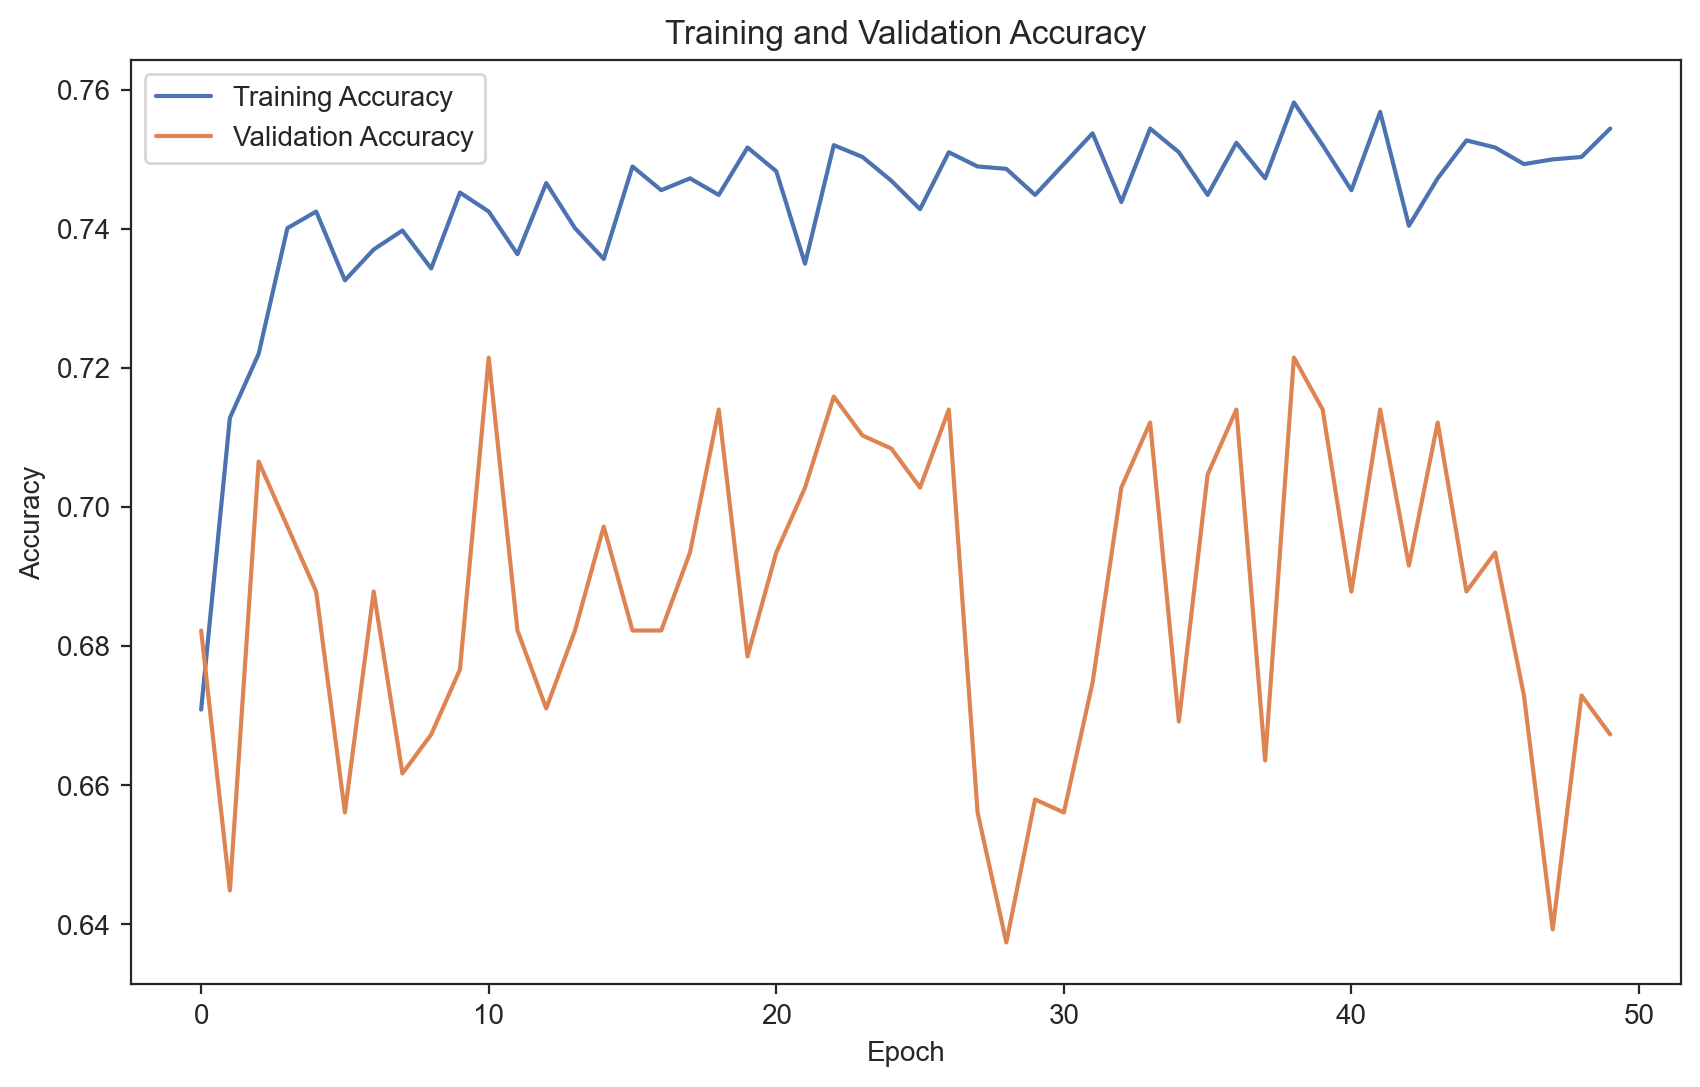

In [ ]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import numpy as np

# Convert the Pandas DataFrame to a NumPy array
X_val_scale_array = X_val_scale.values

# Reshape the NumPy array to add the channel dimension
X_val_scale_reshaped = X_val_scale_array.reshape(X_val_scale_array.shape[0], X_val_scale_array.shape[1], 1)


In [ ]:
# Evaluate the model on the validation set
valid_loss, valid_acc = model.evaluate(X_val_scale_reshaped, y_val_encoded)

21/21 [==============================] - 0s 2ms/step - loss: 0.5927 - accuracy: 0.7055


In [ ]:
from sklearn.metrics import classification_report
# Convert probabilities to class labels
y_pred_cnn = model.predict(X_val_scale_reshaped);
y_pred_cnn_labels = np.argmax(y_pred_cnn, axis=1)

# Now, you can use classification_report with discrete class labels
class_report_cnn = classification_report(y_val_encoded, y_pred_cnn_labels)
print("\nClassification Report:")
print(class_report_cnn)


21/21 [==============================] - 0s 2ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.75      0.61       210
           1       0.86      0.69      0.76       459

    accuracy                           0.71       669
   macro avg       0.69      0.72      0.69       669
weighted avg       0.75      0.71      0.72       669



21/21 [==============================] - 0s 1ms/step


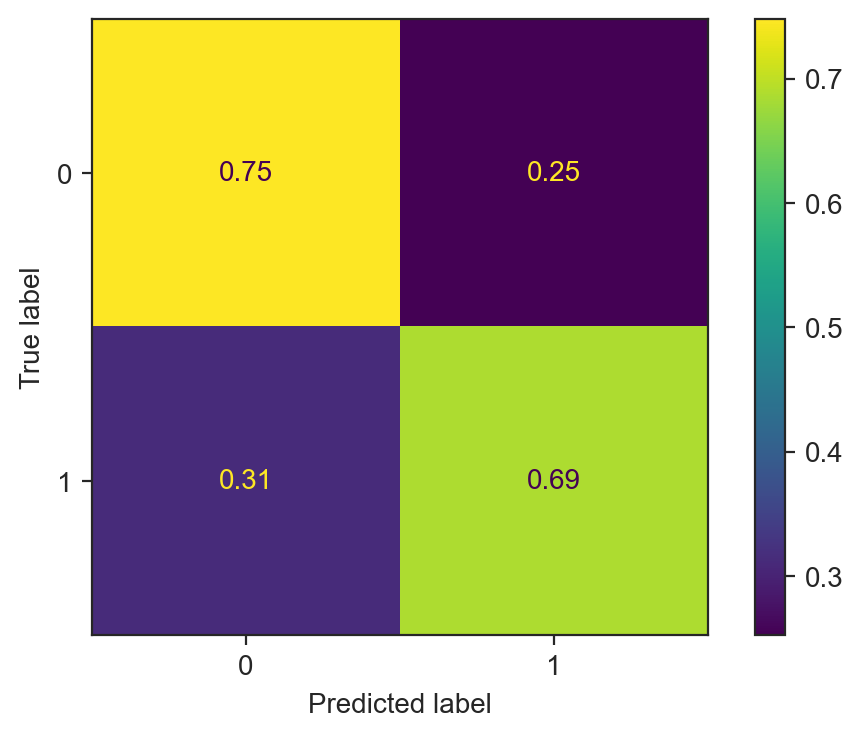

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_val_encoded,np.argmax(model.predict(X_val_scale_reshaped), axis=1),normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();